# FORECAST MODEL FOR COVID-19 USING THE SIGMOID GOMPERTZ FUNCTION. 

** CREATED BY LINCOLN MOURA **

**This study has some work premises which are shown below:**

- It is considered that the use of data on the number of infected persons does not correspond to reality, since it is evidenced the inability to carry out tests on the entire population and consequently to acquire data from lethality, etc;


- The data provided on the number of deaths are considered more accurate although it is not possible to differentiate between deaths caused by other respiratory syndromes or in cases where Covid is not the main cause of death;


- The data collected for this work were made available by: https://coronavirus.jhu.edu/map.html; 


- The data analyzed were performed based on the following countries: US; UK; ITALY; SPAIN; FRANCE; BRAZIL; BELGIUM; GERMANY; CHINA;


- It is necessary to consider that each country has a strategy to combat proliferation, which causes variability in growth rates, maximum value, etc. Individual protection measures collections, educational measures, mass tests and conditions of the public health system are some of the points to be considered in the data evaluation;


- The daily variability of the data is due to the way in which each country updates the cases, making it possible to perceive a high variability of the data mainly on weekends. To address this problem, the moving average technique was used to smooth this phenomenon;


- It is necessary to note that due to the time of incubation and / or evolution of the Coronavirus in the organism, to observe the data in a 'window' around a period for the evaluation of the dynamics of the phenomenon of governmental actions;


- The calculations performed must be considered within a history of government actions and therefore events such as lockdown can provide a significant change in the behavior of the curve;


- The projection of cases of death can be considered as an inference of the number of people who are infected;


- Considering that many countries registered the first cases before Brazil, this work seeks to evaluate the applicability of the model in the forecast of cases in Brazil. An important point in this assessment is to present the dynamics that the point of greatest daily record of cases with the consequent drop in the number of cases indicates a dynamic characteristic of this pandemic.


- It must be considered that the reality of the data demonstrates a social dynamic that directly impacts the divergences of the model. An example is to observe that the number of cases tends to present some steps when the number of cases has significantly reduced, which could be an indication of the economic opening measures.



## Summary


**[1. Importing libraries in Python](#libraries)**<br/>
**[2. COVID-19 - Johns Hopkins Coronavirus Resource Center](#JohnsHopkins)**<br/>
**[3. Day Zero and First Case](#firstcase)**<br/>
**[4. Gompertz Sigmoide and Derived Function](#sigmoid)**<br/>
**[5. Evaluation of Covid-19 Data](#EVALUATION)**<br/>
**[6. Analysis Considering the Moving Average and Impact on Error](#MDMOVEL)**<br/>
**[7. Evaluated the Gompertz Sigmoide Predictions for Brazil](#CONCLUSION)**<br/>
**[8. Conclusion](#CONCLUSION)**<br/>

### 1. Importing libraries in Python <a id="libraries"></a>

In [1]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

### 2.  COVID-19 Map - Johns Hopkins Coronavirus Resource Center <a id="JohnsHopkins"></a>

In [ ]:
%%time
import requests

for filename in ['time_series_covid19_deaths_global.csv']:    
    print(f'Downloading {filename}')
    url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/{filename}'
    myfile = requests.get(url)
    open(filename, 'wb').write(myfile.content)
    
    

In [2]:
deaths_global_df = pd.read_csv('time_series_covid19_deaths_global.csv')

In [3]:
deaths_global_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,127,132,136,153,168,169,173,178,187,193
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,515,522,529,536,542,548,555,561,568,575
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,48,49,49,49,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,3,3,3,3


**Organizing data using countries.**

In [4]:
deaths_global_df = deaths_global_df.groupby(['Country/Region']).sum().reset_index()
deaths_global_df = deaths_global_df.drop(['Lat','Long'], axis=1)
deaths_global_df = deaths_global_df.transpose()
deaths_global_df.columns = deaths_global_df.iloc[0]
deaths_global_df = deaths_global_df[1:]
deaths_global_df = deaths_global_df[['US','United Kingdom', 'Italy', 'France',  'Spain', 'Brazil','Belgium','Germany', 'China']]
deaths_global_df['China'] = np.where(deaths_global_df['China'] > 4630, 3326,deaths_global_df['China'] )
deaths_global_df.index = range(len(deaths_global_df.index))
deaths_global_df

Country/Region,US,United Kingdom,Italy,France,Spain,Brazil,Belgium,Germany,China
0,0,0,0,0,0,0,0,0,17
1,0,0,0,0,0,0,0,0,18
2,0,0,0,0,0,0,0,0,26
3,0,0,0,0,0,0,0,0,42
4,0,0,0,0,0,0,0,0,56
5,0,0,0,0,0,0,0,0,82
6,0,0,0,0,0,0,0,0,131
7,0,0,0,0,0,0,0,0,133
8,0,0,0,0,0,0,0,0,171
9,0,0,0,0,0,0,0,0,213


### 3. Day Zero and First Case <a id="firstcase"></a>
**A FORM OF ANALYSIS FOR COMPARISON BETWEEN COUNTRIES IS TO CONSIDER ZERO DAY AS THE DAY ON WHICH THE FIRST CASE WAS REGISTERED. **

In [5]:
deaths_global_zero = deaths_global_df.apply(lambda col: col.drop_duplicates().reset_index(drop=True))
deaths_global_zero.head(10)

Country/Region,US,United Kingdom,Italy,France,Spain,Brazil,Belgium,Germany,China
0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,17.0
1,1.0,1.0,1,1.0,1.0,1.0,3.0,2.0,18.0
2,6.0,2.0,2,2.0,2.0,3.0,4.0,3.0,26.0
3,7.0,3.0,3,3.0,3.0,6.0,5.0,7.0,42.0
4,11.0,7.0,7,4.0,5.0,11.0,10.0,9.0,56.0
5,12.0,9.0,10,6.0,10.0,15.0,14.0,11.0,82.0
6,14.0,10.0,12,9.0,17.0,25.0,21.0,17.0,131.0
7,17.0,28.0,17,11.0,28.0,34.0,37.0,24.0,133.0
8,21.0,43.0,21,19.0,35.0,46.0,67.0,28.0,171.0
9,22.0,66.0,29,33.0,54.0,59.0,75.0,44.0,213.0


**Trend Using All Dataset. (Number of Deaths)**

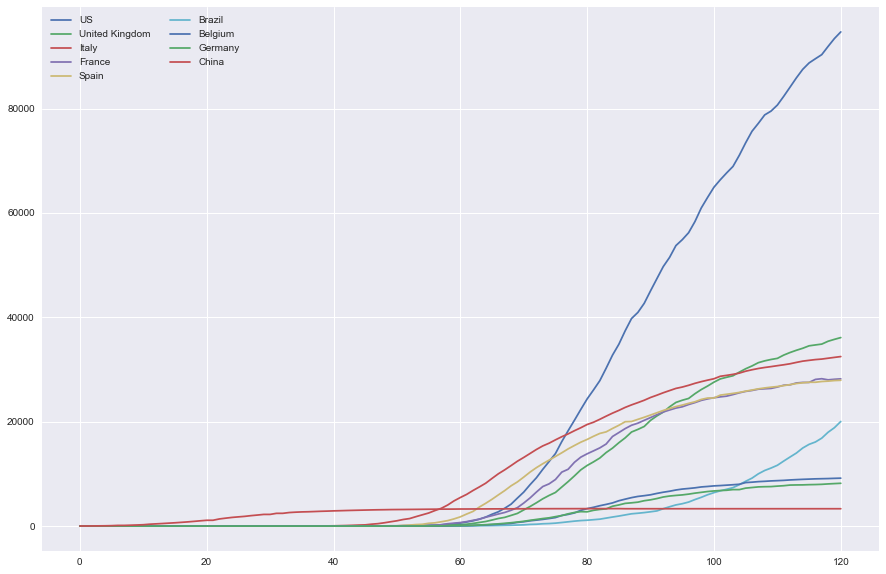

In [6]:
# same plotting code as above!
plt.figure(figsize=(15,10))
plt.plot(deaths_global_df.index, deaths_global_df)
plt.legend(deaths_global_df.columns, ncol=2, loc='upper left');

**Trend using all data sets with the equivalent of day zero equal to the first case record. (Number of Deaths)**

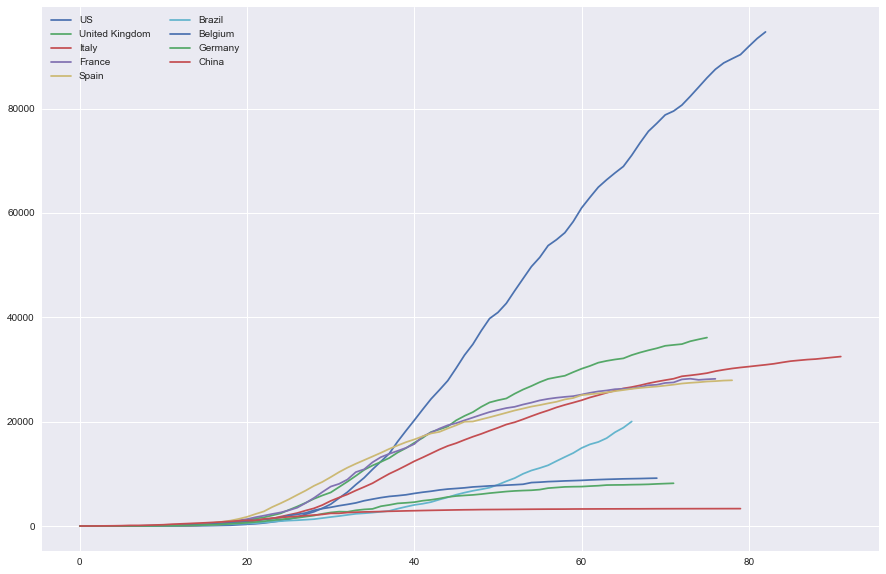

In [7]:
# same plotting code as above!
plt.figure(figsize=(15,10))
plt.plot(deaths_global_zero.index, deaths_global_zero)
plt.legend(deaths_global_zero.columns, ncol=2, loc='upper left');

** Daily Variation of Data. **

We can see that there is a great variability in the data that depends on the way each country organizes the update.

In [8]:
deaths_global_difference = deaths_global_zero.diff().dropna(how='all')
deaths_global_difference.head(5)

Country/Region,US,United Kingdom,Italy,France,Spain,Brazil,Belgium,Germany,China
1,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0
2,5.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,8.0
3,1.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,16.0
4,4.0,4.0,4.0,1.0,2.0,5.0,5.0,2.0,14.0
5,1.0,2.0,3.0,2.0,5.0,4.0,4.0,2.0,26.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002538375B8D0>,
      dtype=object)

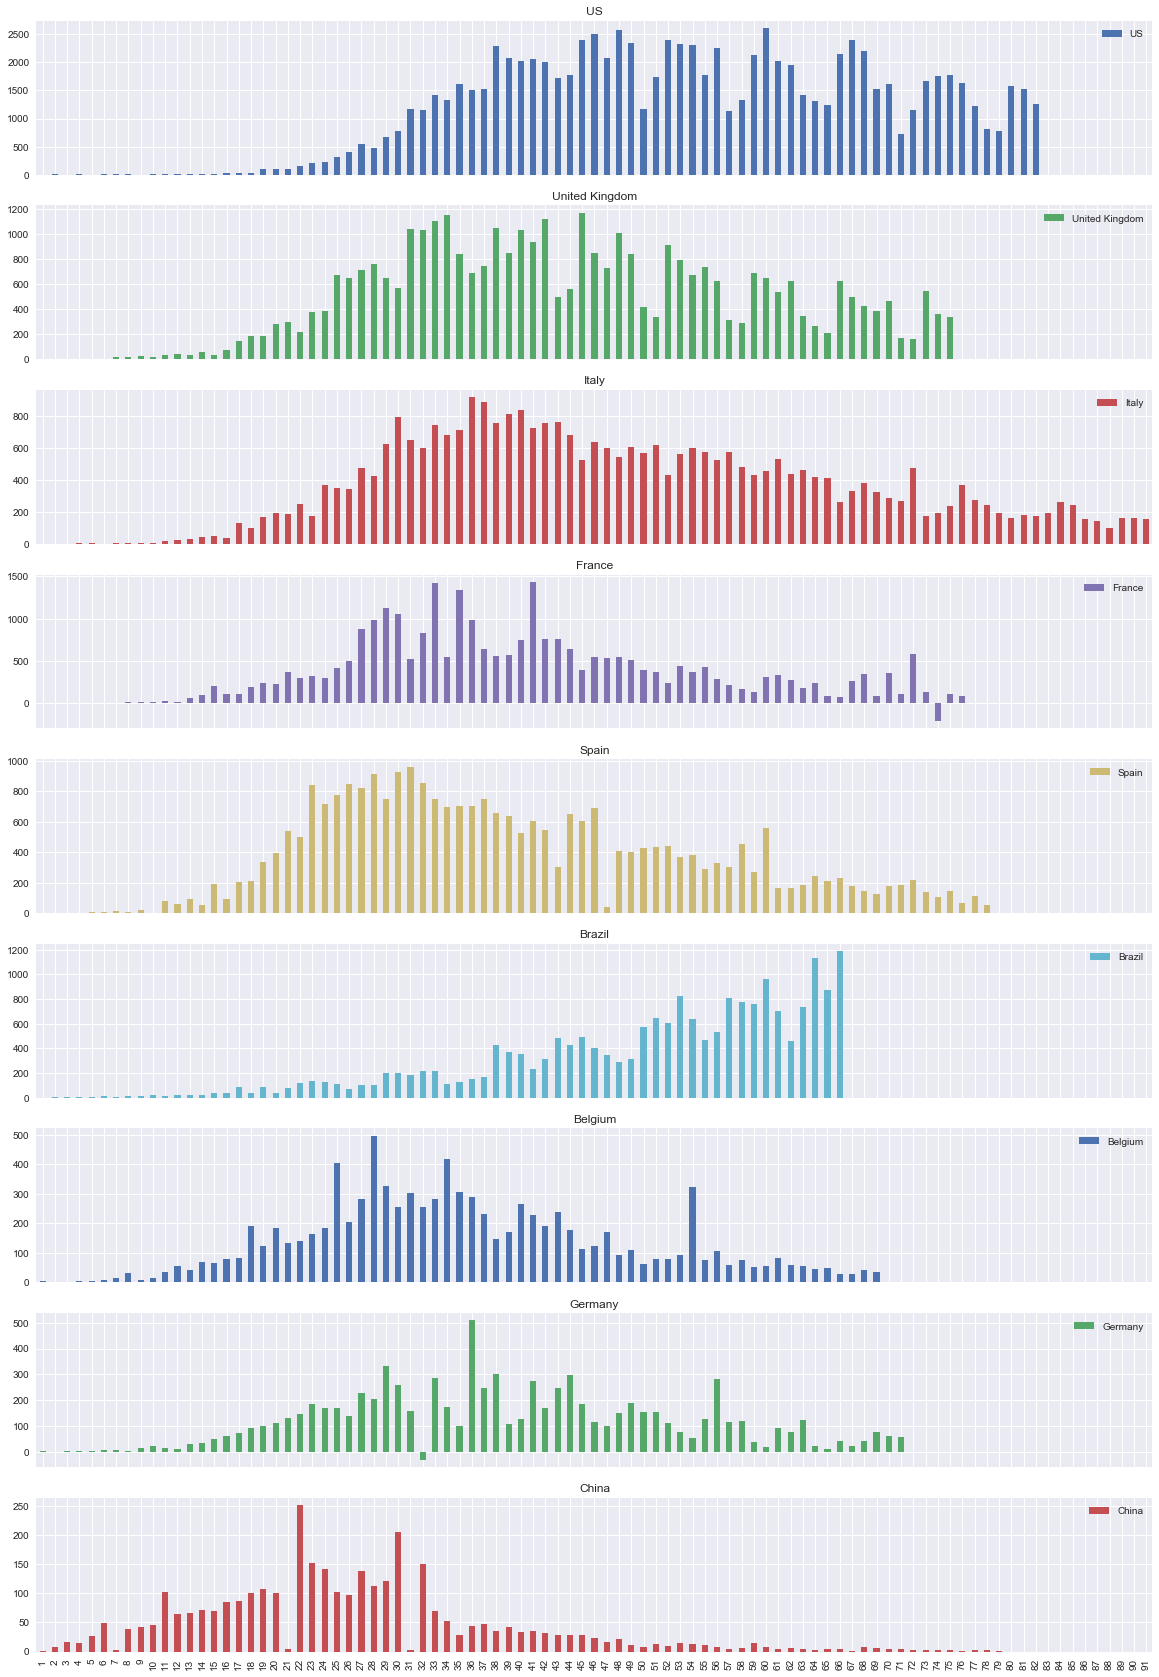

In [9]:
deaths_global_difference.plot(subplots=True, kind='bar' , figsize=(20,30))

**Graph of the total number of cases accumulated by countries.**

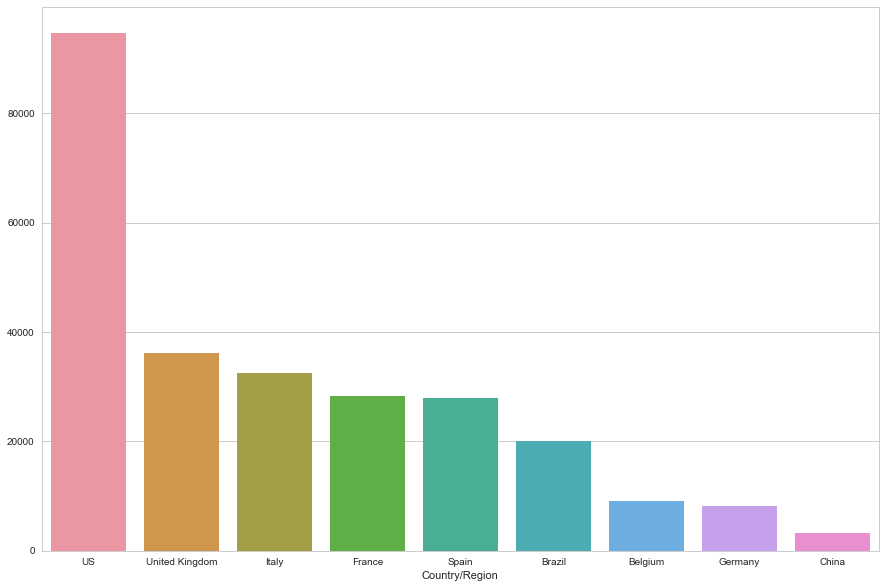

In [10]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
ax = sns.barplot(x = deaths_global_difference.sum().index, y = deaths_global_difference.sum().sort_values(ascending=False))

**Comparison between the countries with the largest number of Covid-19 cases in the world.**

We can see in the graph a comparison between the countries, corresponding to the evolution of the virus day by day. The United States has a variation of daily cases with similar behavior in all countries due to being a country with the highest number of deaths in the world. The exception is Brazil, which clearly changes the shape of the curve indicating a reaction of the virus in a corresponding or more aggressive proportion than that of the United States.

Looking at the data from the comparison between Italy and the United Kingdom, we can see something like a line indicating a similarity in the evolution of the virus in these countries. These two countries have a similar number of deaths on the evaluation date.

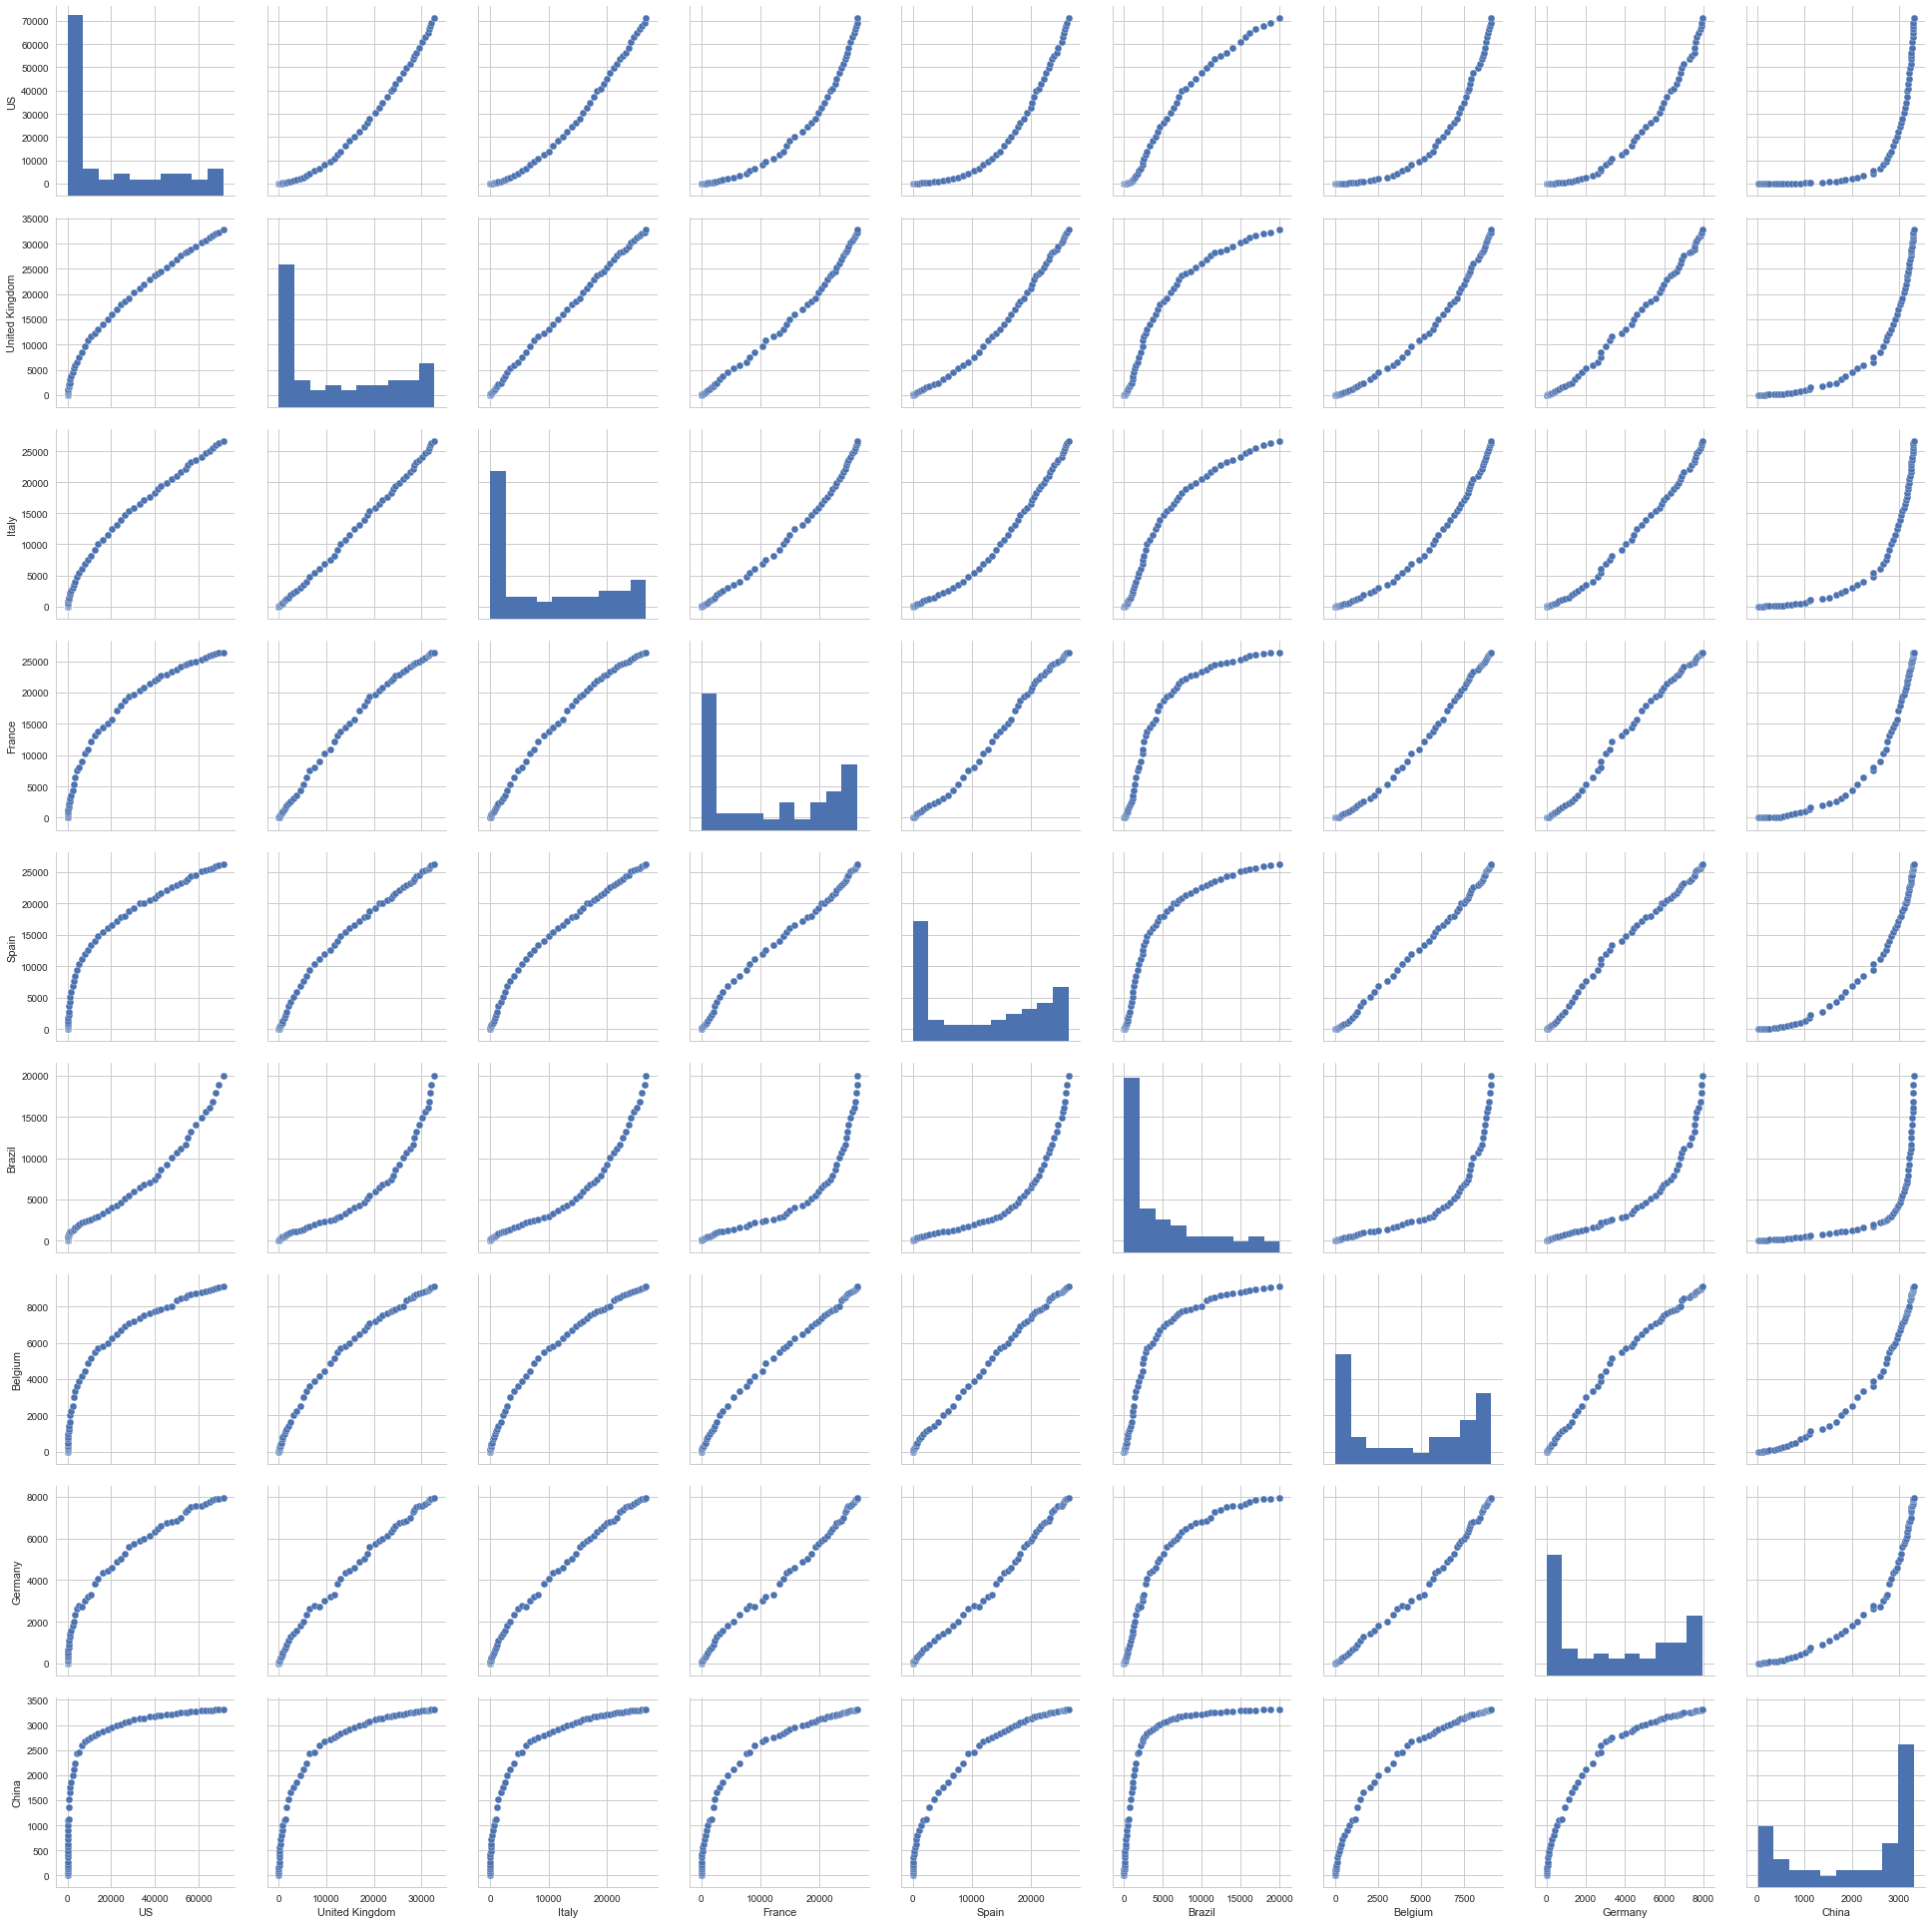

In [11]:
sns.pairplot(deaths_global_zero.dropna(), size=3);

### 4. GOMPERTZ SIGMOIDE AND DERIVED FUNCTION <a id="sigmoid"></a>

The sigmoid function GOMPERTZ is a function of the type:

# $ y(t) = \alpha  .  e^{- \beta . e^{- \gamma * t }} $

Where:
$\alpha $ alpha is the number that indicates the maximum value when the value in 't' tends to infinity.

The derivative of the curve is given by:

# $\alpha . \beta . \gamma . e^{-\beta . e^{-\gamma . t}} . e^{-\gamma . t} $

The point of maximum variation of the curve is given by:

# $ t = \frac{1}{\gamma} . ln(\beta)$ 
# $ y = \alpha . e^{-1}$

This type of function has a characteristic in its derivative that is approximately found in cases of daily death records of covid-19. Death values increase rapidly until reaching the maximum value and then there is a slower decrease in the number of cases extending over time.

The figure below shows the sigmoid function with its derivative.

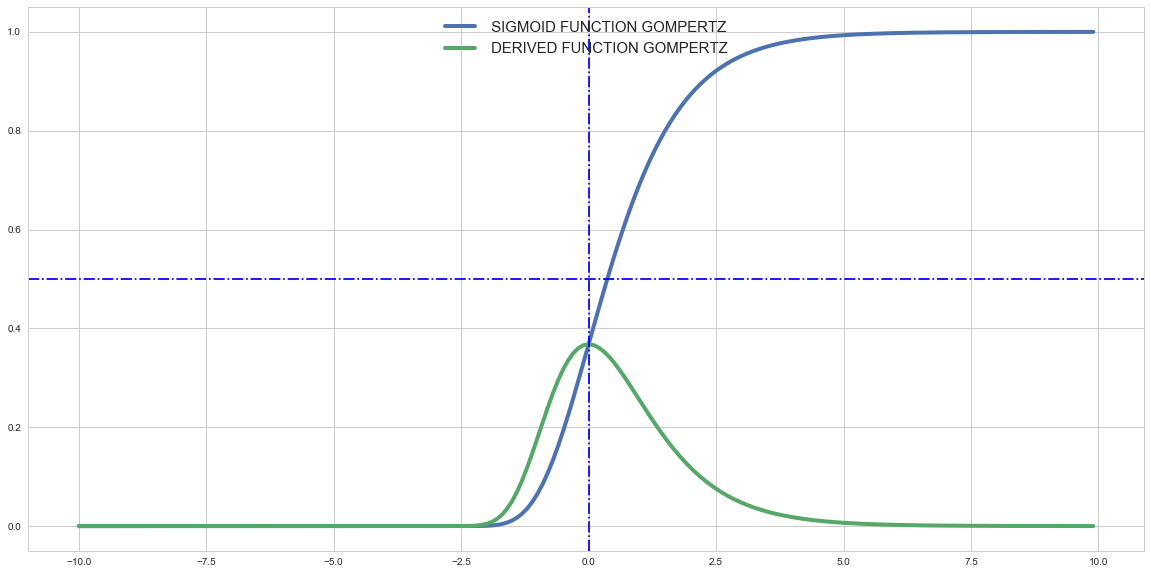

In [12]:
## FUNÇÃO SIGMÓIDE DE Gompertz
a = b = g =1
def sigGompertz (x, a, b, g):
        return a*np.exp(-b*np.exp(-g*x))
#CÁLCULO DA DERIVADA DA SIGMÓIDE
def devGompertz(x, a,b,g):
    return np.array(a*b*g*np.exp(-b*np.exp(-g*x))*np.exp(-g*x))

x=np.arange(-10,10,0.1)
sigGompertz (x, a, b, g)
plt.figure(figsize=(20,10))
plt.plot(x, sigGompertz (x, a, b, g), lw=4, label=' SIGMOID FUNCTION GOMPERTZ')
plt.plot(x, devGompertz(x, a,b,g), lw=4, label=' DERIVED FUNCTION GOMPERTZ')
plt.axvline(0, color='b', ls ='-.')
plt.axhline(0.5, color='b', ls ='-.')
plt.legend(loc='upper center', fontsize=15)
plt.grid(True)
plt.show()

### 5. EVALUATION OF COVID-19 DATA. <a id="EVALUATION"></a>

**Establishing the functions that will evaluate the data.**

As a method to determine the best parameters of the sigmoid function, the Curve_Fit function of the Scipy package is used.

In [13]:
#Moving average function
def moving_average(data, d_mediamovel):
    
    media_movel = []
    
    for i in range(len(data)+1-d_mediamovel):
        arr = data[i:i+d_mediamovel]
        media_movel.append(arr.mean())
    
    x = range(d_mediamovel,len(data)+1,1)
    y = media_movel
    
    return x , y 

In [14]:
def SigmoideGompertz(x,y,country,d_mediamovel, previsao):

    y_med_movel_d = []
    
    if (d_mediamovel>0):
        x,y = moving_average(y, d_mediamovel)
    
        for count in range (len(y)-1):
            y_med_movel_d.append(y[count+1]-y[count])

    y_med_movel = y    
    
    a = b = g = 0
    try:
        
        def sigGompertz (x, a, b, g):
            return a*np.exp(-b*np.exp(-g*x))

        popt, pcov = curve_fit(sigGompertz, x, y,method='lm',maxfev = 8000)
        popt
        a=popt[0]
        b=popt[1]
        g=popt[2]
    
    except:
        popt, pcov = curve_fit(sigGompertz, x, y,method='trf')
        a=popt[0]
        b=popt[1]
        g=popt[2]
        
    if (b<0):
        popt, pcov = curve_fit(sigGompertz, x, y,method='trf')
        a=popt[0]
        b=popt[1]
        g=popt[2]
    
    def devGompertz(x, a,b,g):
        return np.array(a*b*g*np.exp(-b*np.exp(-g*x))*np.exp(-g*x))
    
    sig_inf = int((1/g)*np.log(b))
    
    n_max_deaths = a
        
    diascomprevisao = range(len(y)+previsao+d_mediamovel)
    ypred_ssigGompertz = sigGompertz(diascomprevisao, a,b,g)
    ypred_devsigGompertz = devGompertz(diascomprevisao, a,b,g)
    
    def rmse(predictions, targets):
        return np.sqrt(((predictions - targets) ** 2).mean())
    
    err = rmse(y, ypred_ssigGompertz [d_mediamovel:len(y)+d_mediamovel])
    
    return ypred_ssigGompertz, ypred_devsigGompertz, (1/g)*np.log(b), a*np.exp(-1), n_max_deaths, err, y_med_movel,y_med_movel_d

**Performing the CurveFit of the dataset.**

Performing the CurveFit of the historical number of deaths. We can observe qualitatively the similarity of the mathematical curve and the real values.

In [15]:
forecasting = pd.DataFrame()
Dias_previsao = 25
Media_movel = 0

for i in deaths_global_zero.columns:
    treino = deaths_global_zero[i][~pd.isnull(deaths_global_zero[i])]   
    forecasting[i] = SigmoideGompertz(treino.index, treino , i ,Media_movel, Dias_previsao) 

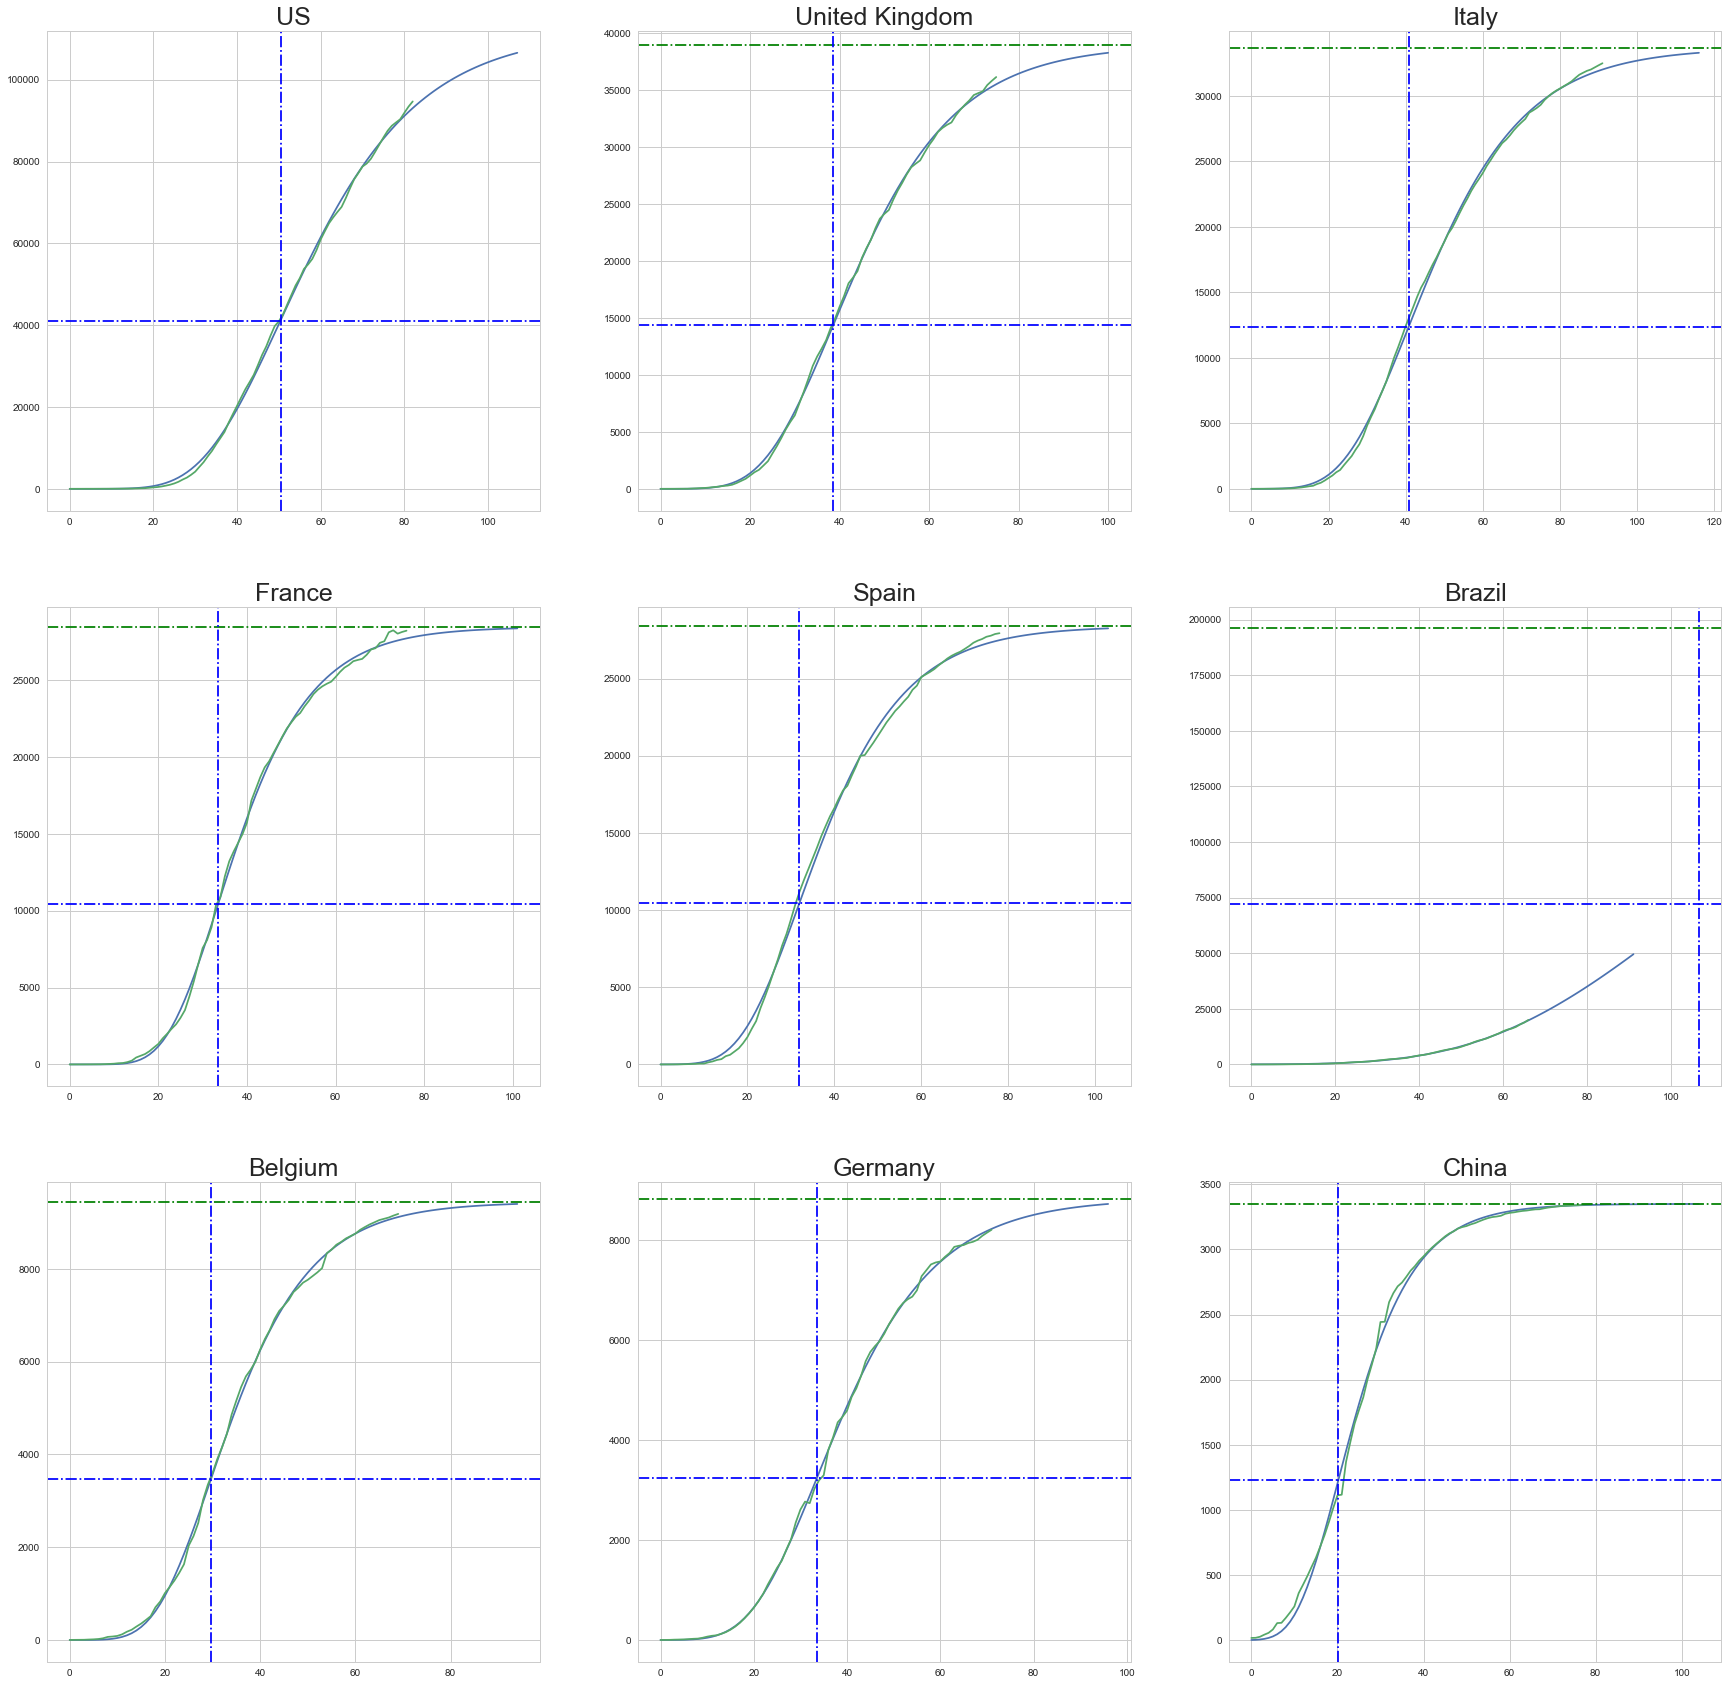

In [16]:
plt.figure(figsize=(30,30))
subplt = 1
for i in deaths_global_zero.columns:
    plt.subplot(3, 3, subplt)
    plt.plot(forecasting[i][0])
    plt.plot(deaths_global_zero[i])
    plt.axhline(forecasting[i][4], color='g', ls ='-.')
    plt.axvline(forecasting[i][2], color='b', ls ='-.')
    plt.axhline(forecasting[i][3], color='b', ls ='-.')
    plt.title(i, size=25)
    subplt+=1

The daily variation in the number of cases is observed as a variable with a high level of noise due to the ways in which countries have updated the values. Generally, on weekends, fewer numbers are recorded than weekly, with probable compensation at the beginning of the week. As a way to filter this noise in the model, the moving average technique will be dealt with later on.

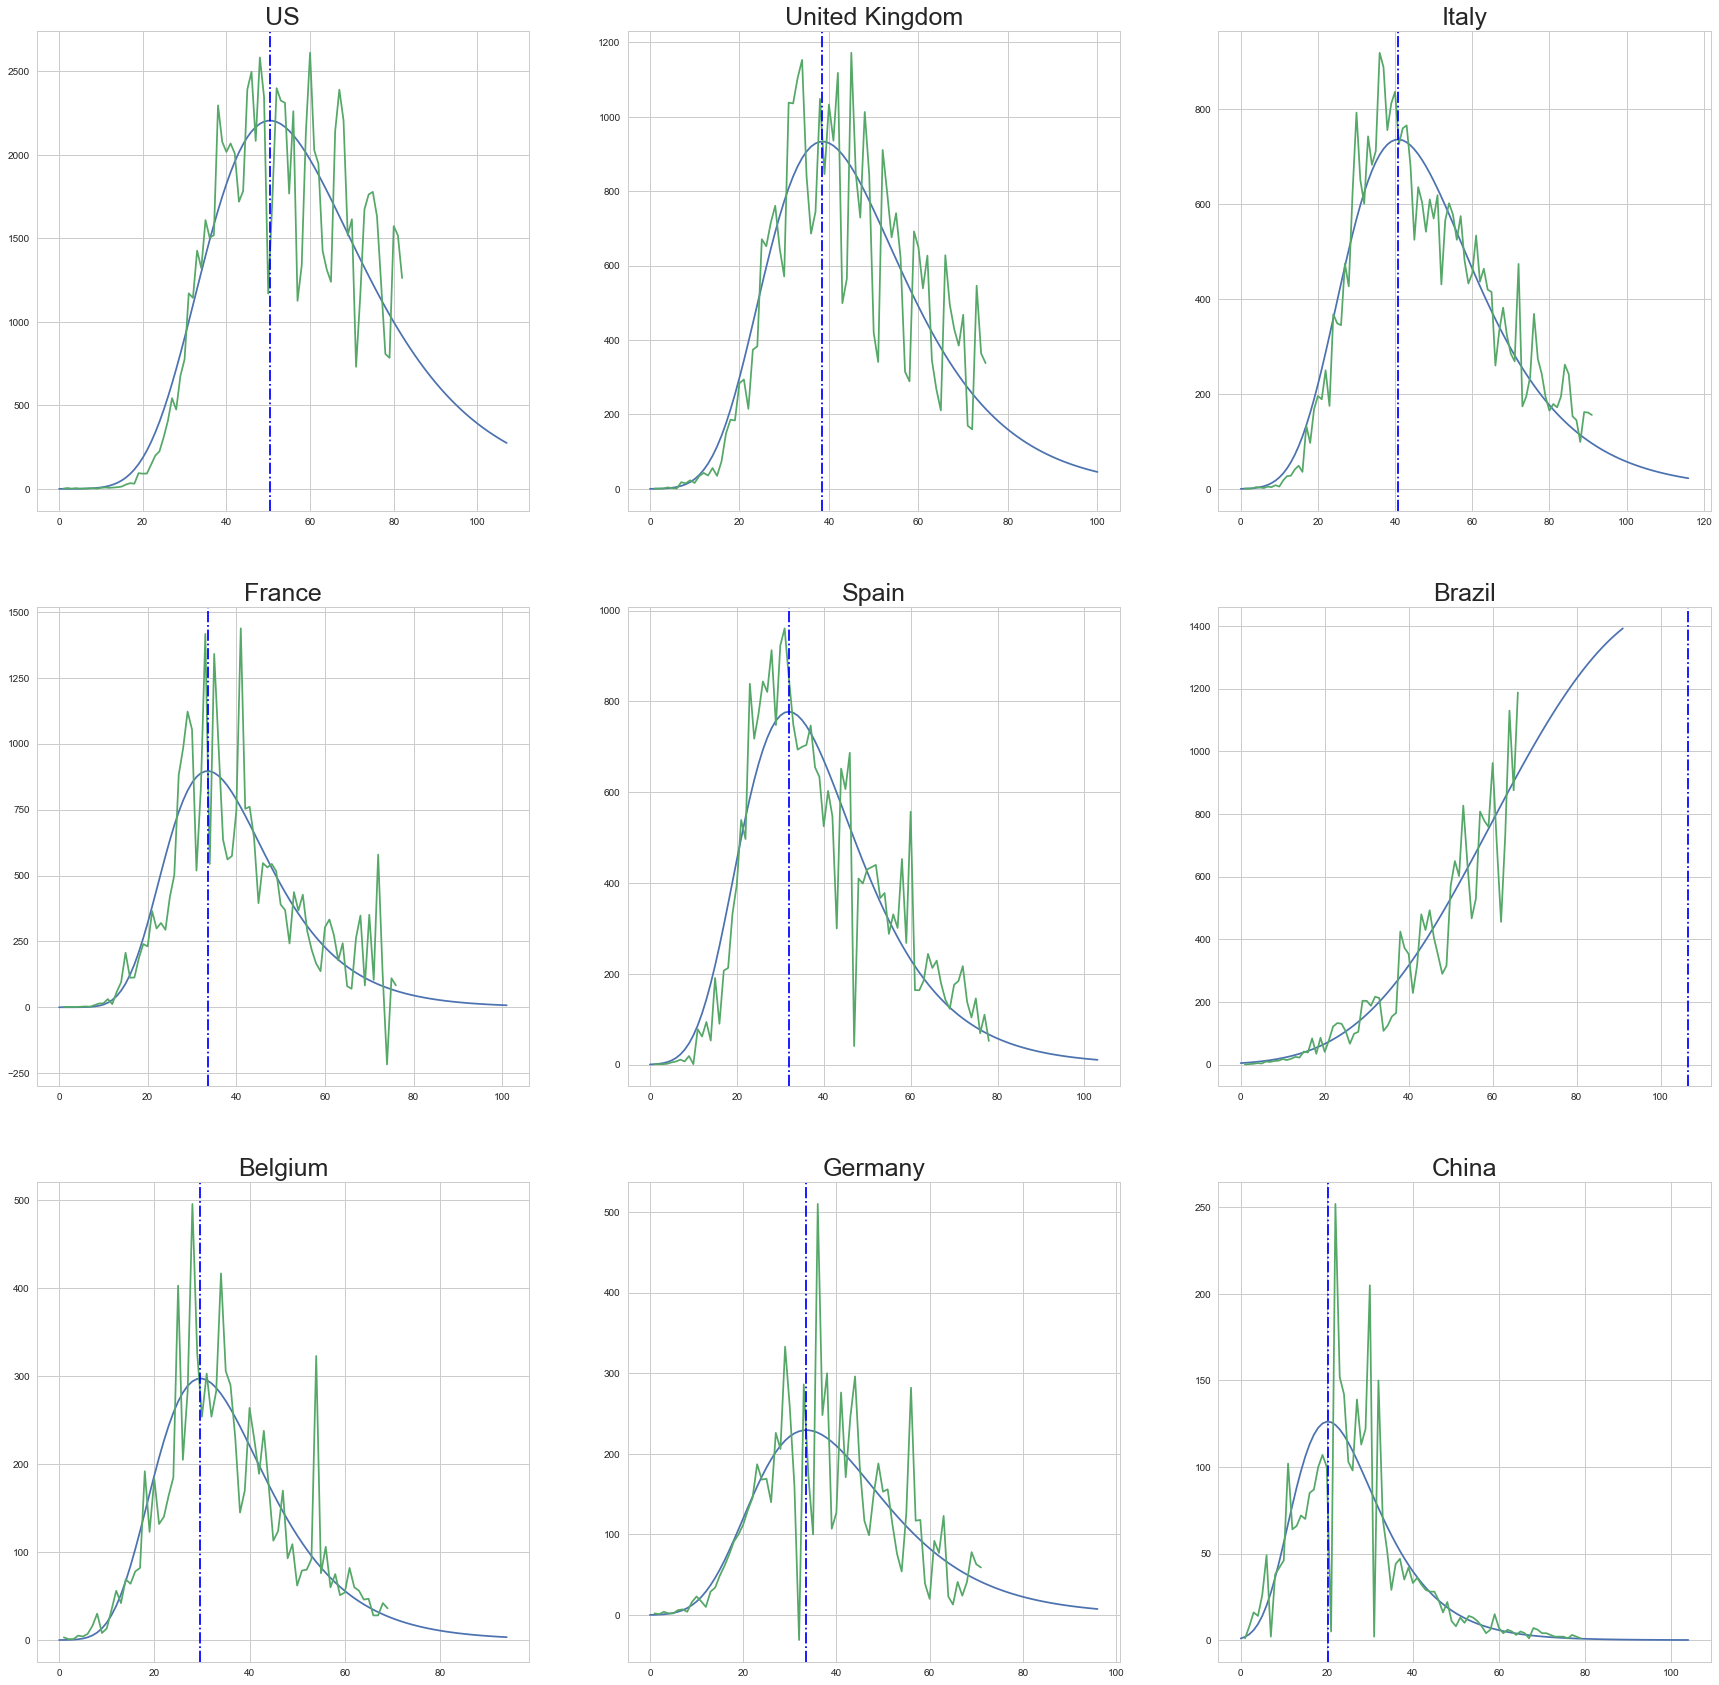

In [17]:
plt.figure(figsize=(30,30))
subplt = 1
for i in deaths_global_zero.columns:
    plt.subplot(3, 3, subplt)
    plt.plot(forecasting[i][1])
    plt.plot(deaths_global_difference[i])
    plt.axvline(forecasting[i][2], color='b', ls ='-.')
    plt.title(i, size=25)
    subplt+=1

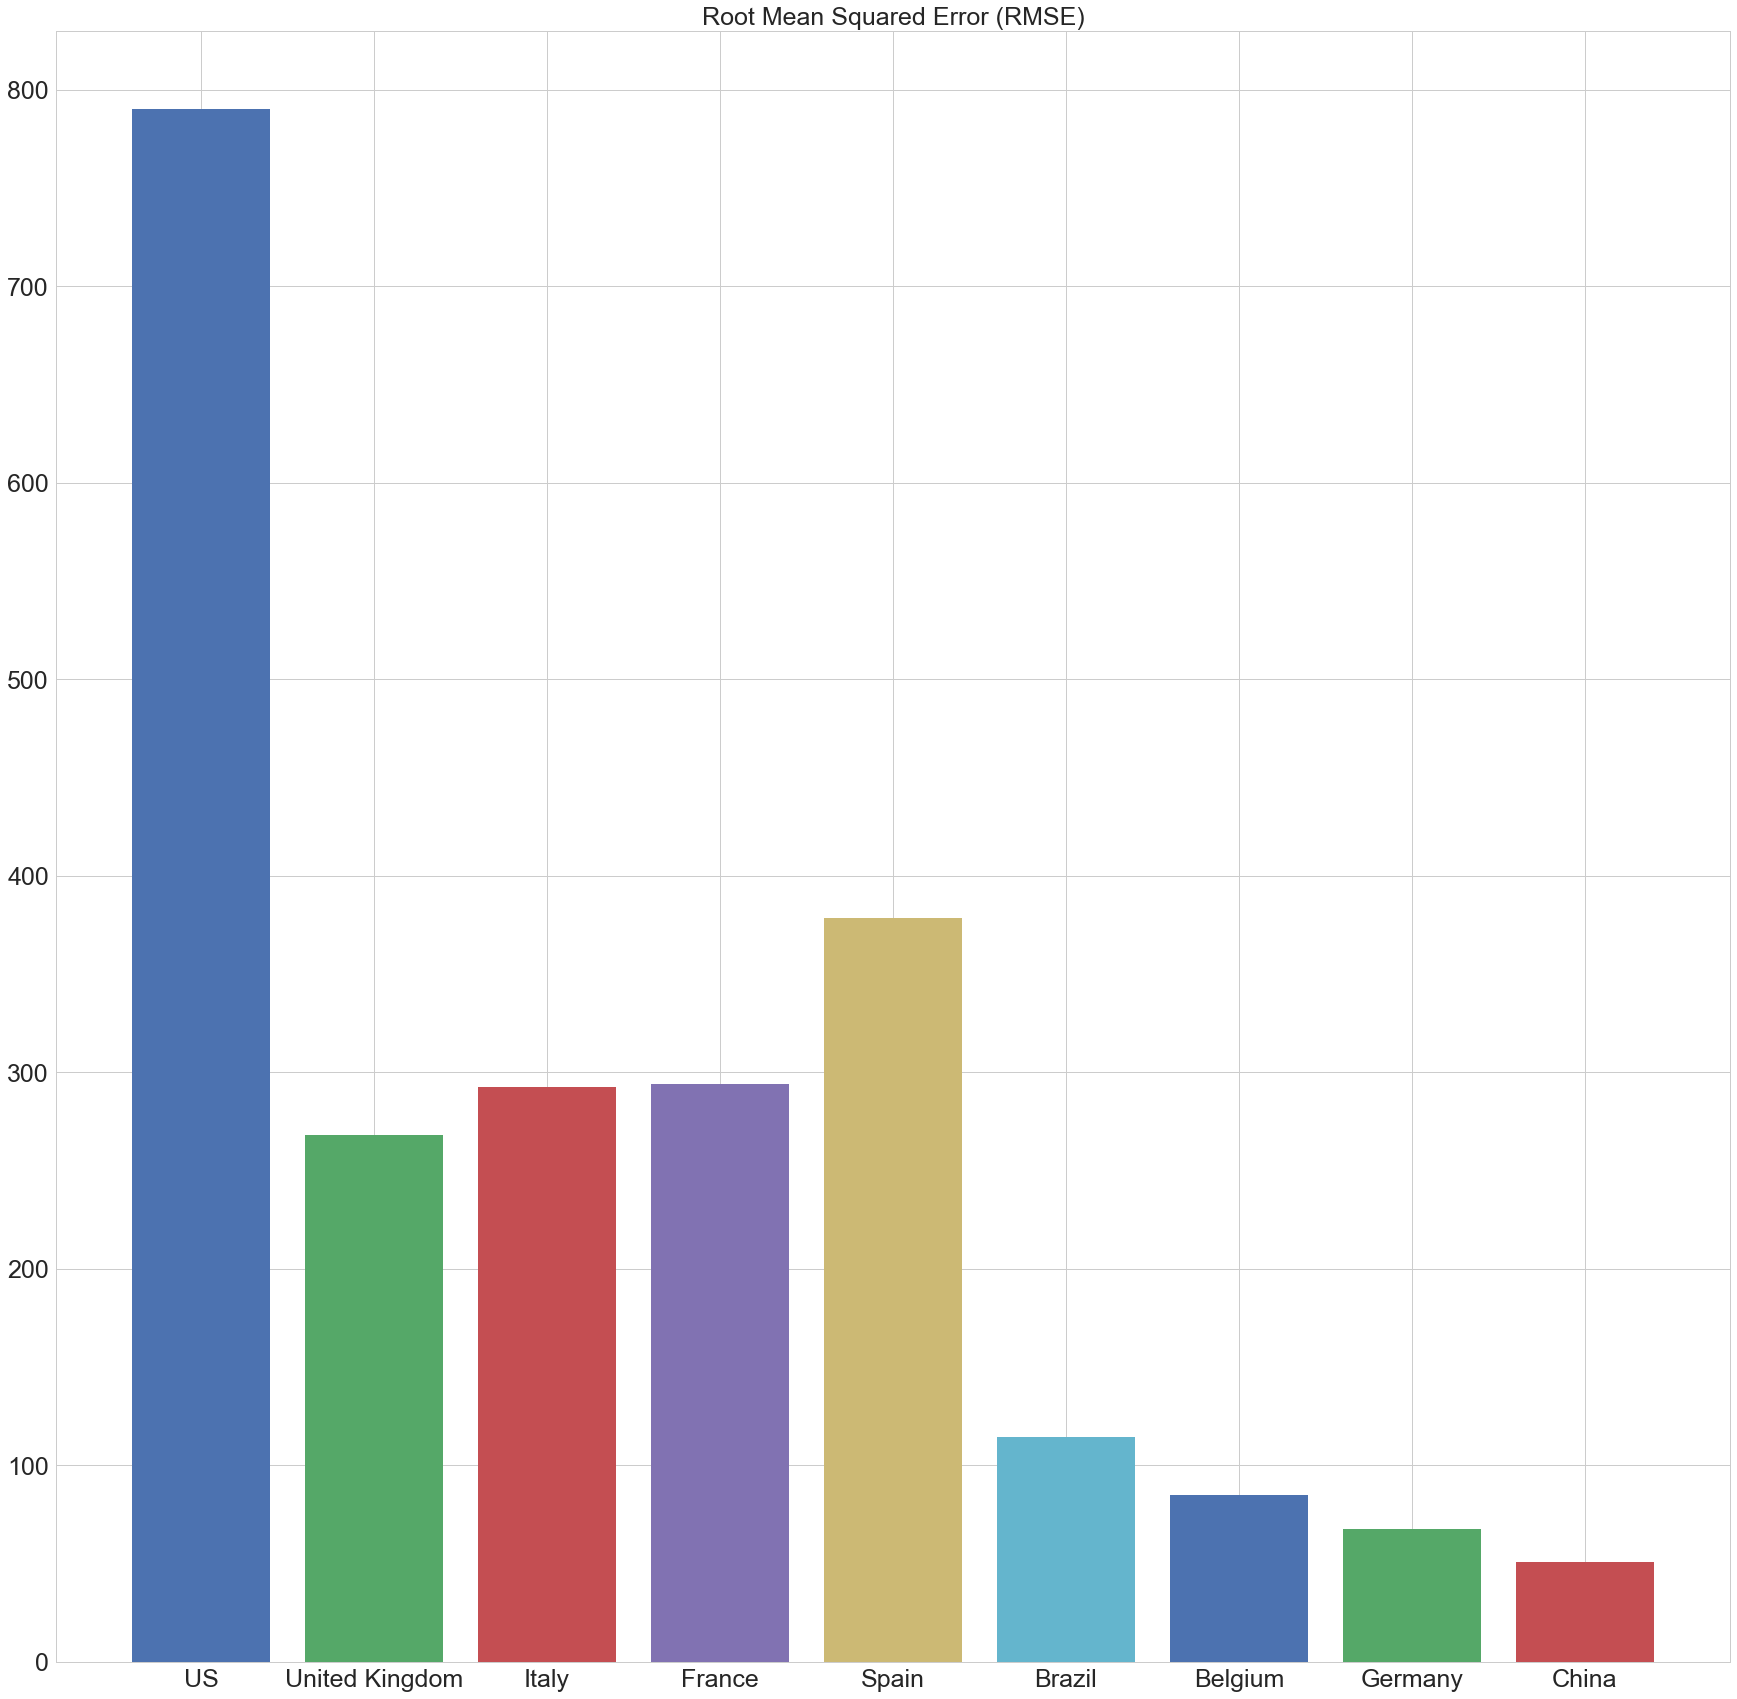

In [58]:
plt.figure(figsize=(30,30))

for i in deaths_global_zero.columns:
    plt.bar(i, forecasting[i][5])
    plt.title("Root Mean Squared Error (RMSE)", size=25)
    plt.rcParams['xtick.labelsize'] = 25
    plt.rcParams['ytick.labelsize'] = 25

### 6. ANALYSIS CONSIDERING THE MOVING AVERAGE AND IMPACT ON ERROR <a id="MDMOVEL"></a>

Moving average application using 5 days as parameter.

In [19]:
forecasting_med_mov = pd.DataFrame()
Dias_previsao = 50
Media_movel = 5

for i in deaths_global_zero.columns:
    treino = deaths_global_zero[i][~pd.isnull(deaths_global_zero[i])] 
    forecasting_med_mov[i] = SigmoideGompertz(treino.index, treino ,i,Media_movel, Dias_previsao) 

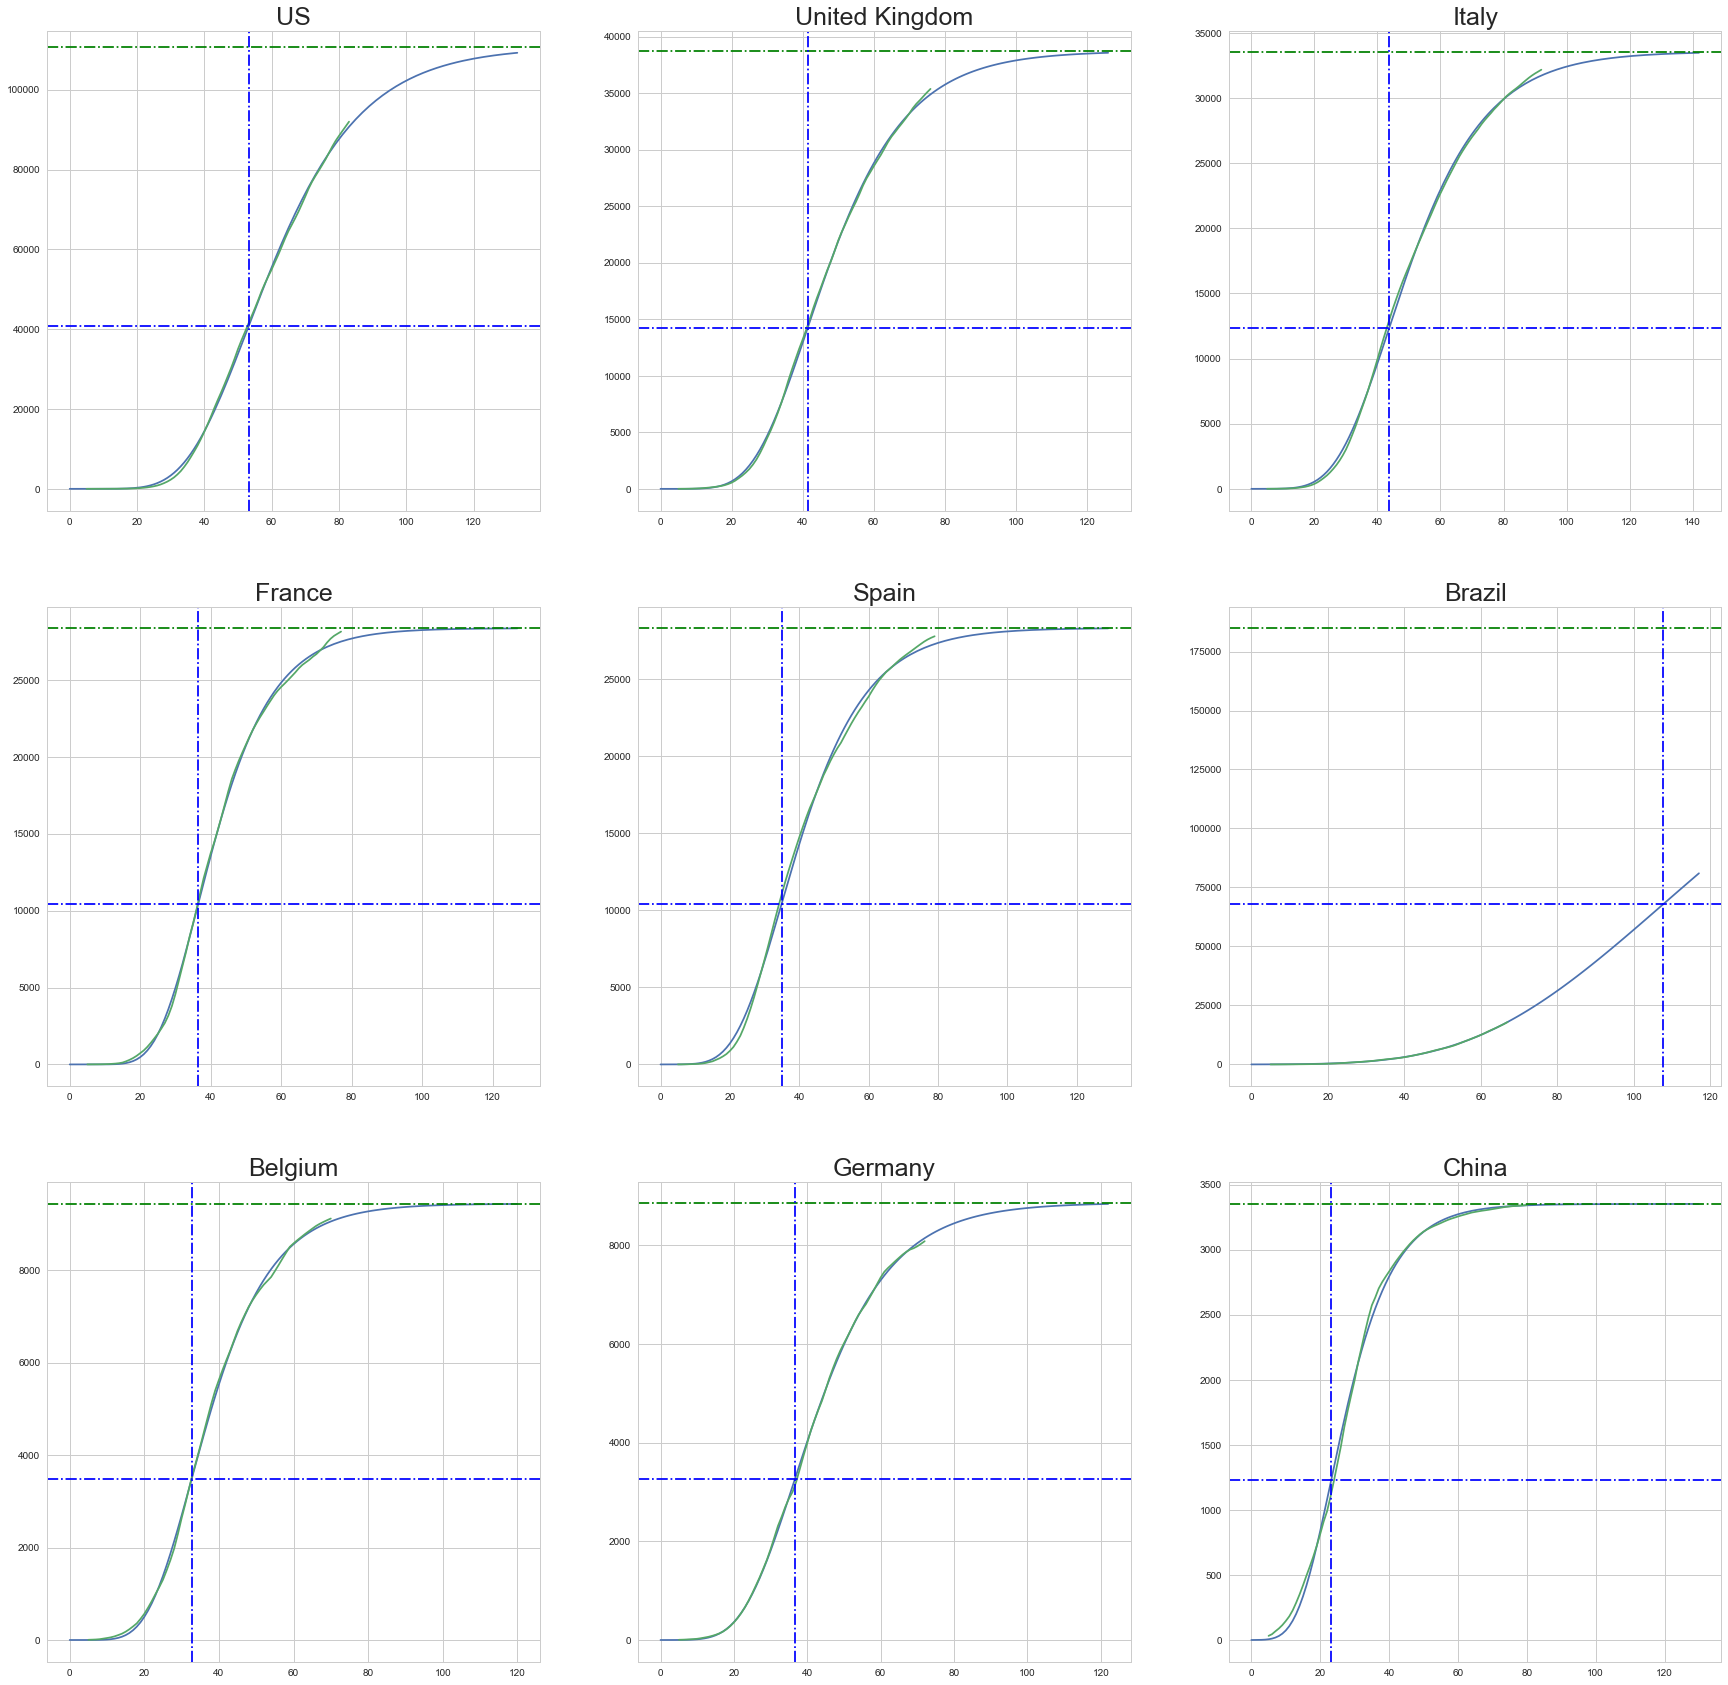

In [20]:
plt.figure(figsize=(30,30))
subplt = 1
for i in deaths_global_zero.columns:
    plt.subplot(3, 3, subplt)
    plt.plot(forecasting_med_mov[i][0])
    plt.plot(range(Media_movel,len(forecasting_med_mov[i][6])+Media_movel), forecasting_med_mov[i][6])
    plt.axhline(forecasting_med_mov[i][4], color='g', ls ='-.')
    plt.axvline(forecasting_med_mov[i][2], color='b', ls ='-.')
    plt.axhline(forecasting_med_mov[i][3], color='b', ls ='-.')
    plt.title(i, size=25)
    subplt+=1

**Com a utilização da média móvel ocorre a suavização dos dados e consequentemente a diminuição do erro.**

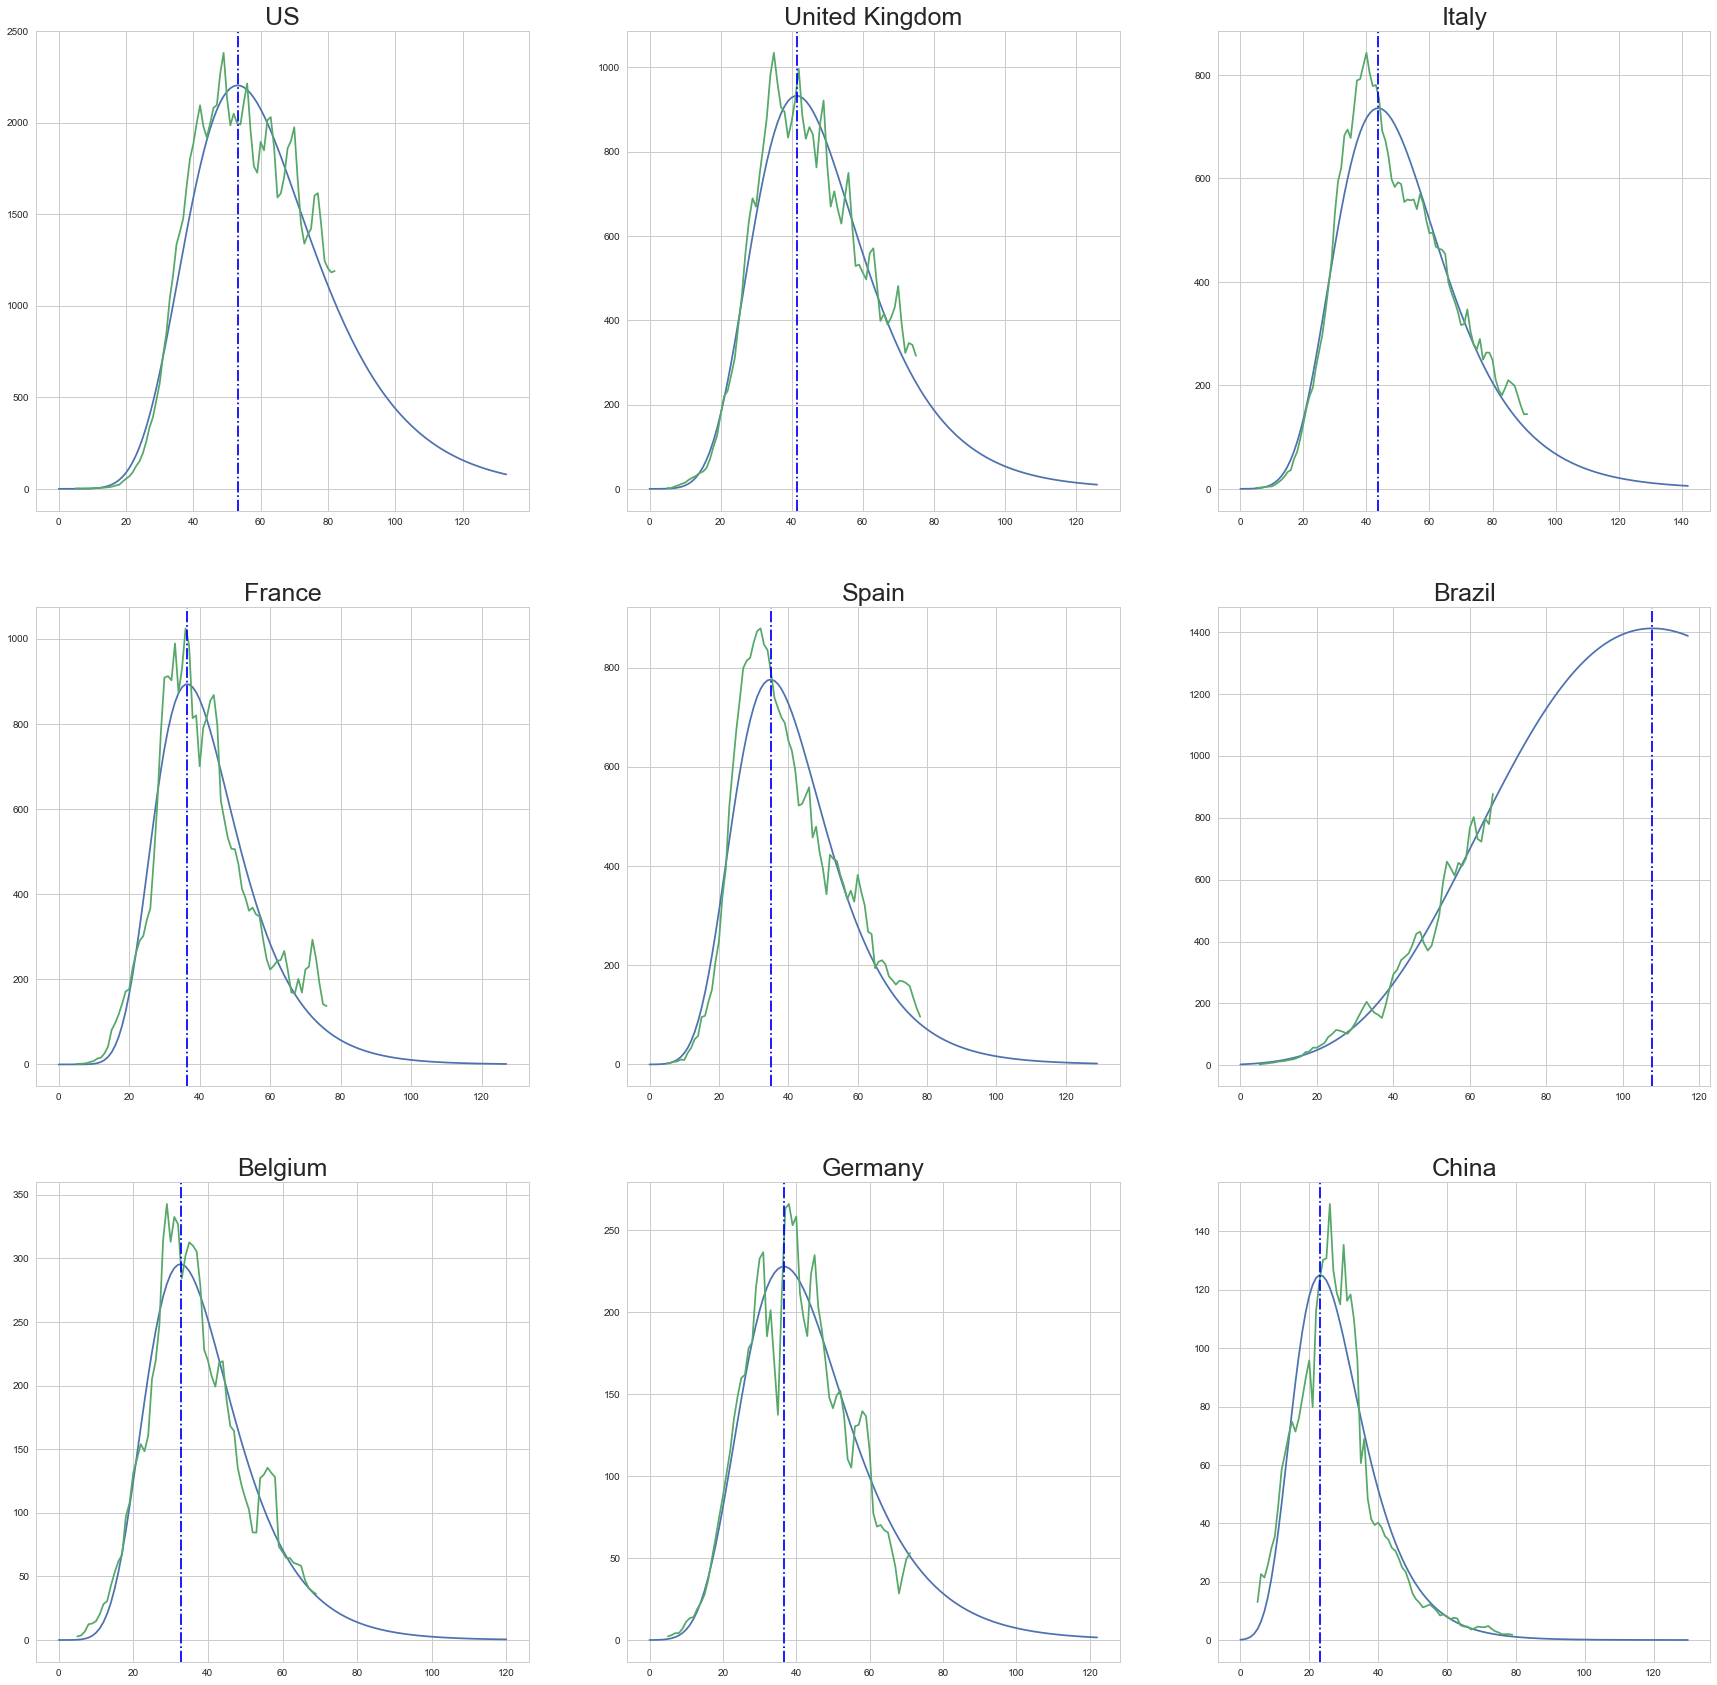

In [21]:
plt.figure(figsize=(30,30))
subplt = 1
for i in deaths_global_zero.columns:
    plt.subplot(3, 3, subplt)
    plt.plot(forecasting_med_mov[i][1])
    plt.plot(range(Media_movel,len(forecasting_med_mov[i][7])+Media_movel),forecasting_med_mov[i][7])
    plt.axvline(forecasting_med_mov[i][2], color='b', ls ='-.')
    plt.title(i, size=25)
    subplt+=1

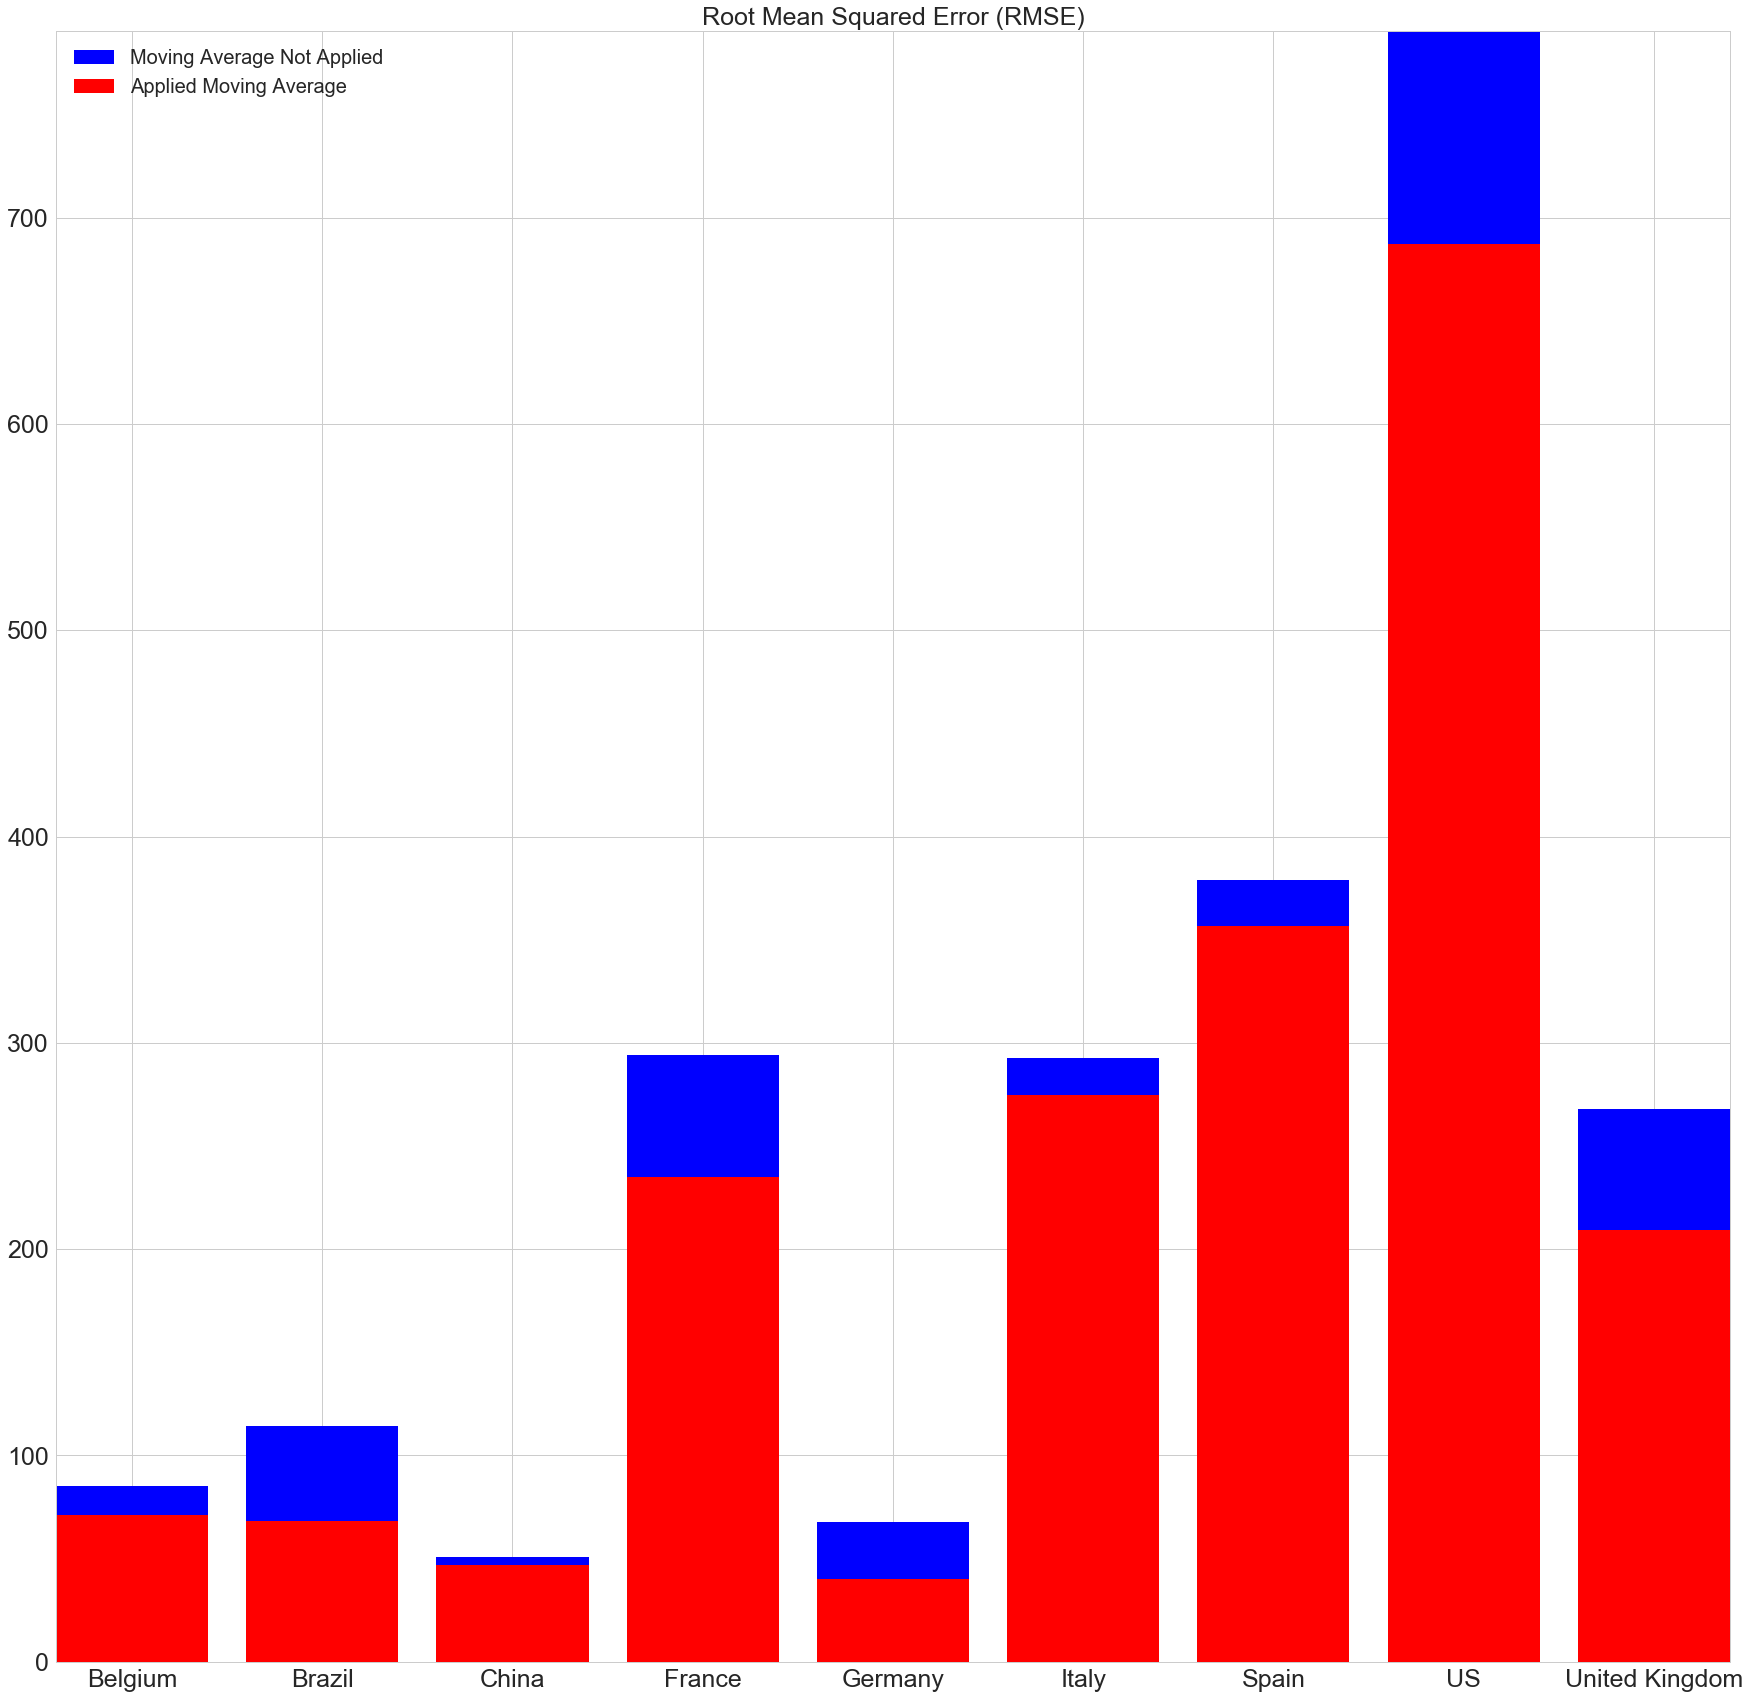

In [87]:
erro1 = []
erro2 = []
for i in deaths_global_zero.columns:
    erro1.append(forecasting[i][5])
    erro2.append(forecasting_med_mov[i][5])

plt.figure(figsize=(30,30))
w=0.8
ax = plt.subplot(111)
ax.bar(deaths_global_zero.columns,erro1, width=w,color='b', align='center')
ax.bar(deaths_global_zero.columns,erro2, width=w,color='r', align='center')   
ax.legend(['Moving Average Not Applied','Applied Moving Average'], loc='upper left', fontsize=20)
plt.title("Root Mean Squared Error (RMSE)", size=25)
ax.autoscale(tight=True)

### 7. EVALUATED THE GOMPERTZ SIGMOIDE FOR BRAZIL<a id="brazil"></a>

As we can see in the previous graphs, Brazil is the only country among those with the highest number of cases that has not yet reached the point of highest death record and consequently does not yet have an indication of the decrease in the number of deaths.

The question that this work wants to answer is about the performance of Sigmoide de Gompertz to make projections for Brazil. We want to carry out an empirical check based on data from other countries. Thus, it is considered to use the maximum record point found using the entire dataset and perform the CurveFit procedure considering the data 7 days before and 7 days after the maximum record point and make a one-week forecast with percentage error values per day.

#### 7.1 PERCENTAGE ERROR 7 DAYS BEFORE THE POINT OF MAXIMUM DAILY RECORDS

In [23]:
forecasting_med_mov_inflex = pd.DataFrame()

d_pre_inflex = 5
Dias_previsao = 7
Media_movel = 5

for i in deaths_global_zero.columns:
    treino = deaths_global_zero[i][~pd.isnull(deaths_global_zero[i])] 
    treino = treino[:int(forecasting_med_mov[i][2])-d_pre_inflex]
    forecasting_med_mov_inflex[i] = SigmoideGompertz(treino.index, treino ,i,Media_movel, Dias_previsao) 

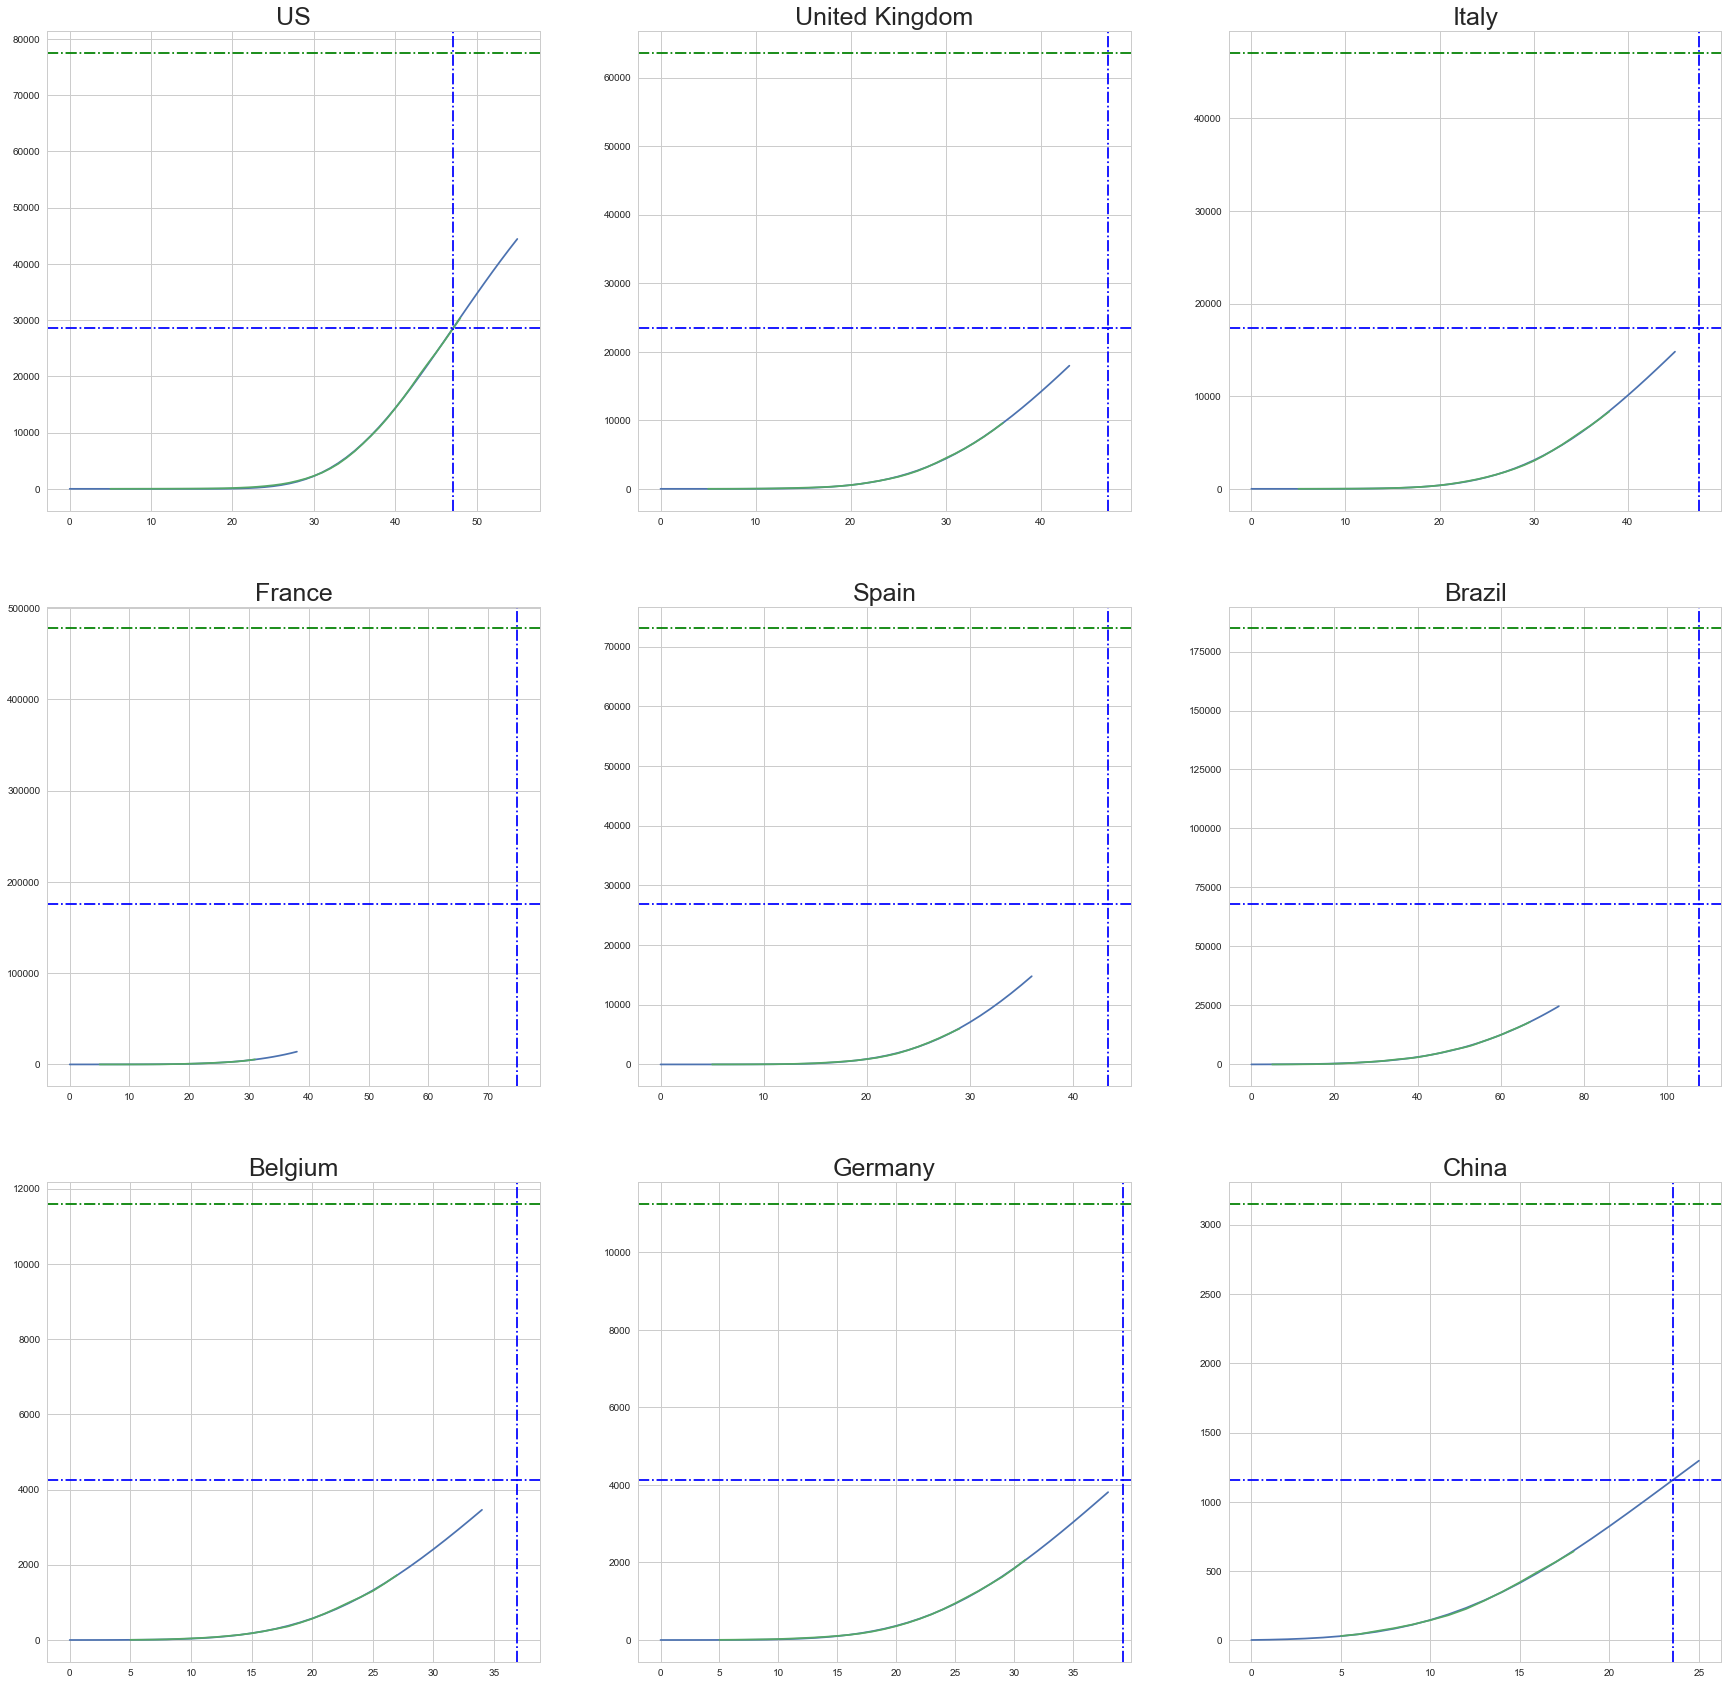

In [24]:
plt.figure(figsize=(30,30))
subplt = 1
for i in deaths_global_zero.columns:
    plt.subplot(3, 3, subplt)
    plt.plot(forecasting_med_mov_inflex[i][0])
    plt.plot(range(Media_movel,len(forecasting_med_mov_inflex[i][6])+Media_movel), forecasting_med_mov_inflex[i][6])
    plt.axhline(forecasting_med_mov_inflex[i][4], color='g', ls ='-.')
    plt.axvline(forecasting_med_mov_inflex[i][2], color='b', ls ='-.')
    plt.axhline(forecasting_med_mov_inflex[i][3], color='b', ls ='-.')
    plt.title(i, size=25)
    subplt+=1

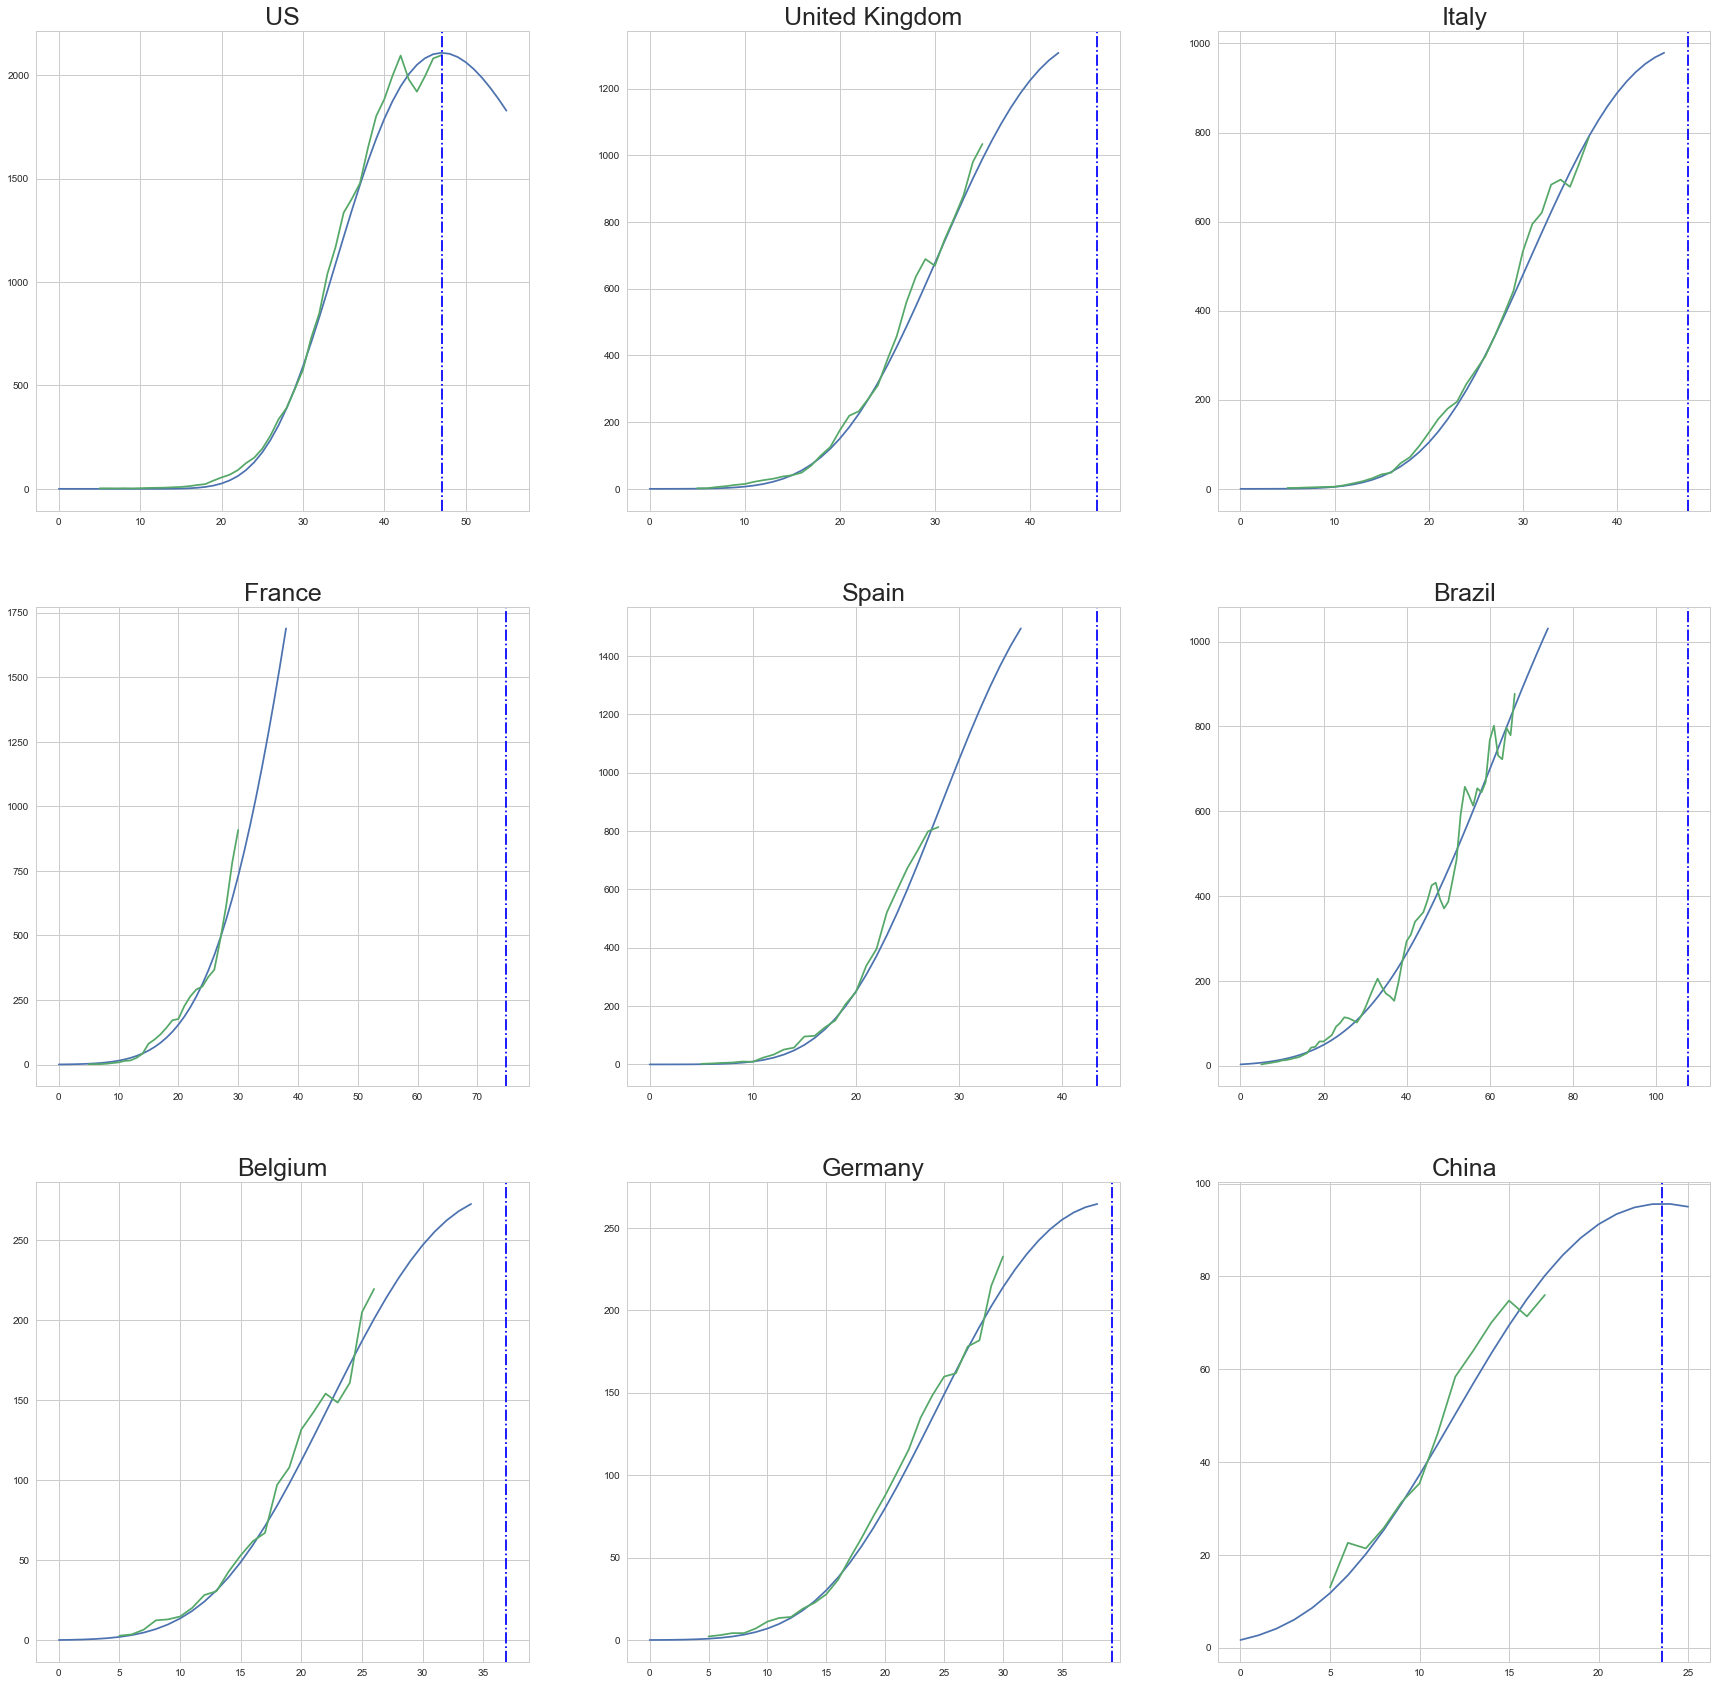

In [25]:
plt.figure(figsize=(30,30))
subplt = 1
for i in deaths_global_zero.columns:
    plt.subplot(3, 3, subplt)
    plt.plot(forecasting_med_mov_inflex[i][1])
    plt.plot(range(Media_movel,len(forecasting_med_mov_inflex[i][7])+Media_movel),forecasting_med_mov_inflex[i][7])
    plt.axvline(forecasting_med_mov_inflex[i][2], color='b', ls ='-.')
    plt.title(i, size=25)
    subplt+=1

In [26]:
dados_erros={}

for i in forecasting_med_mov.columns:
    erro_previsao = []
    if (i != 'Brazil'):
        reality = forecasting_med_mov[i][6][len(forecasting_med_mov_inflex[i][6]):len(forecasting_med_mov_inflex[i][6])+Dias_previsao]
        forecast7daysbefore = forecasting_med_mov_inflex[i][0][-Dias_previsao:]
        
        for day in range(Dias_previsao):
            erro_previsao.append((100*abs(reality[day]-forecast7daysbefore[day])/reality[day]))
        dados_erros[i]=erro_previsao
        
dados_erros = pd.DataFrame(dados_erros)
dados_erros

,Belgium,China,France,Germany,Italy,Spain,US,United Kingdom
0,1.720751,1.265052,2.430317,0.573860,1.045908,3.576579,0.225142,0.976166
1,5.103507,1.128958,1.048761,1.591820,1.530509,6.289714,1.081848,2.772269
2,8.270627,0.636344,0.350108,3.126517,1.958996,9.163519,1.263144,4.764838
3,9.494619,2.040235,4.044805,5.843640,2.868647,12.298758,1.139606,7.289836
4,10.780630,0.243537,7.749893,9.566696,4.037632,16.008825,1.288469,9.466246
5,11.509208,2.027207,11.102720,10.619525,5.175229,19.903649,1.422939,11.219264
6,11.023735,4.400137,15.421033,9.826866,6.474821,24.251506,1.653700,12.400022


We can see below that the error increases according to the forecast day, with day zero being the smallest US error of 0.22% and Spain's biggest error of 3.57%. For the 7 day forecast 1.65% for US and 24.25% for Spain.

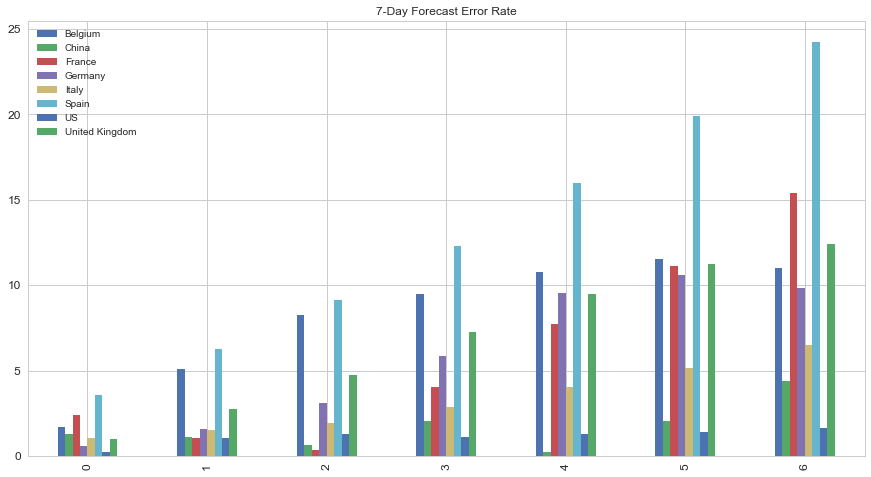

In [27]:
dados_erros.plot.bar(rot=90,figsize=(15,8),title='7-Day Forecast Error Rate',fontsize=12);

#### 7.2 PERCENTAGE ERROR 7 DAYS AFTER THE POINT OF MAXIMUM DAILY RECORDS

In [28]:
forecasting_med_mov_inflex = pd.DataFrame()
d_pos_inflex = 5
Dias_previsao = 7
Media_movel = 5

for i in deaths_global_zero.columns:
    treino = deaths_global_zero[i][~pd.isnull(deaths_global_zero[i])] 
    treino = treino[:int(forecasting_med_mov[i][2])+d_pos_inflex]
    forecasting_med_mov_inflex[i] = SigmoideGompertz(treino.index, treino ,i,Media_movel, Dias_previsao) 

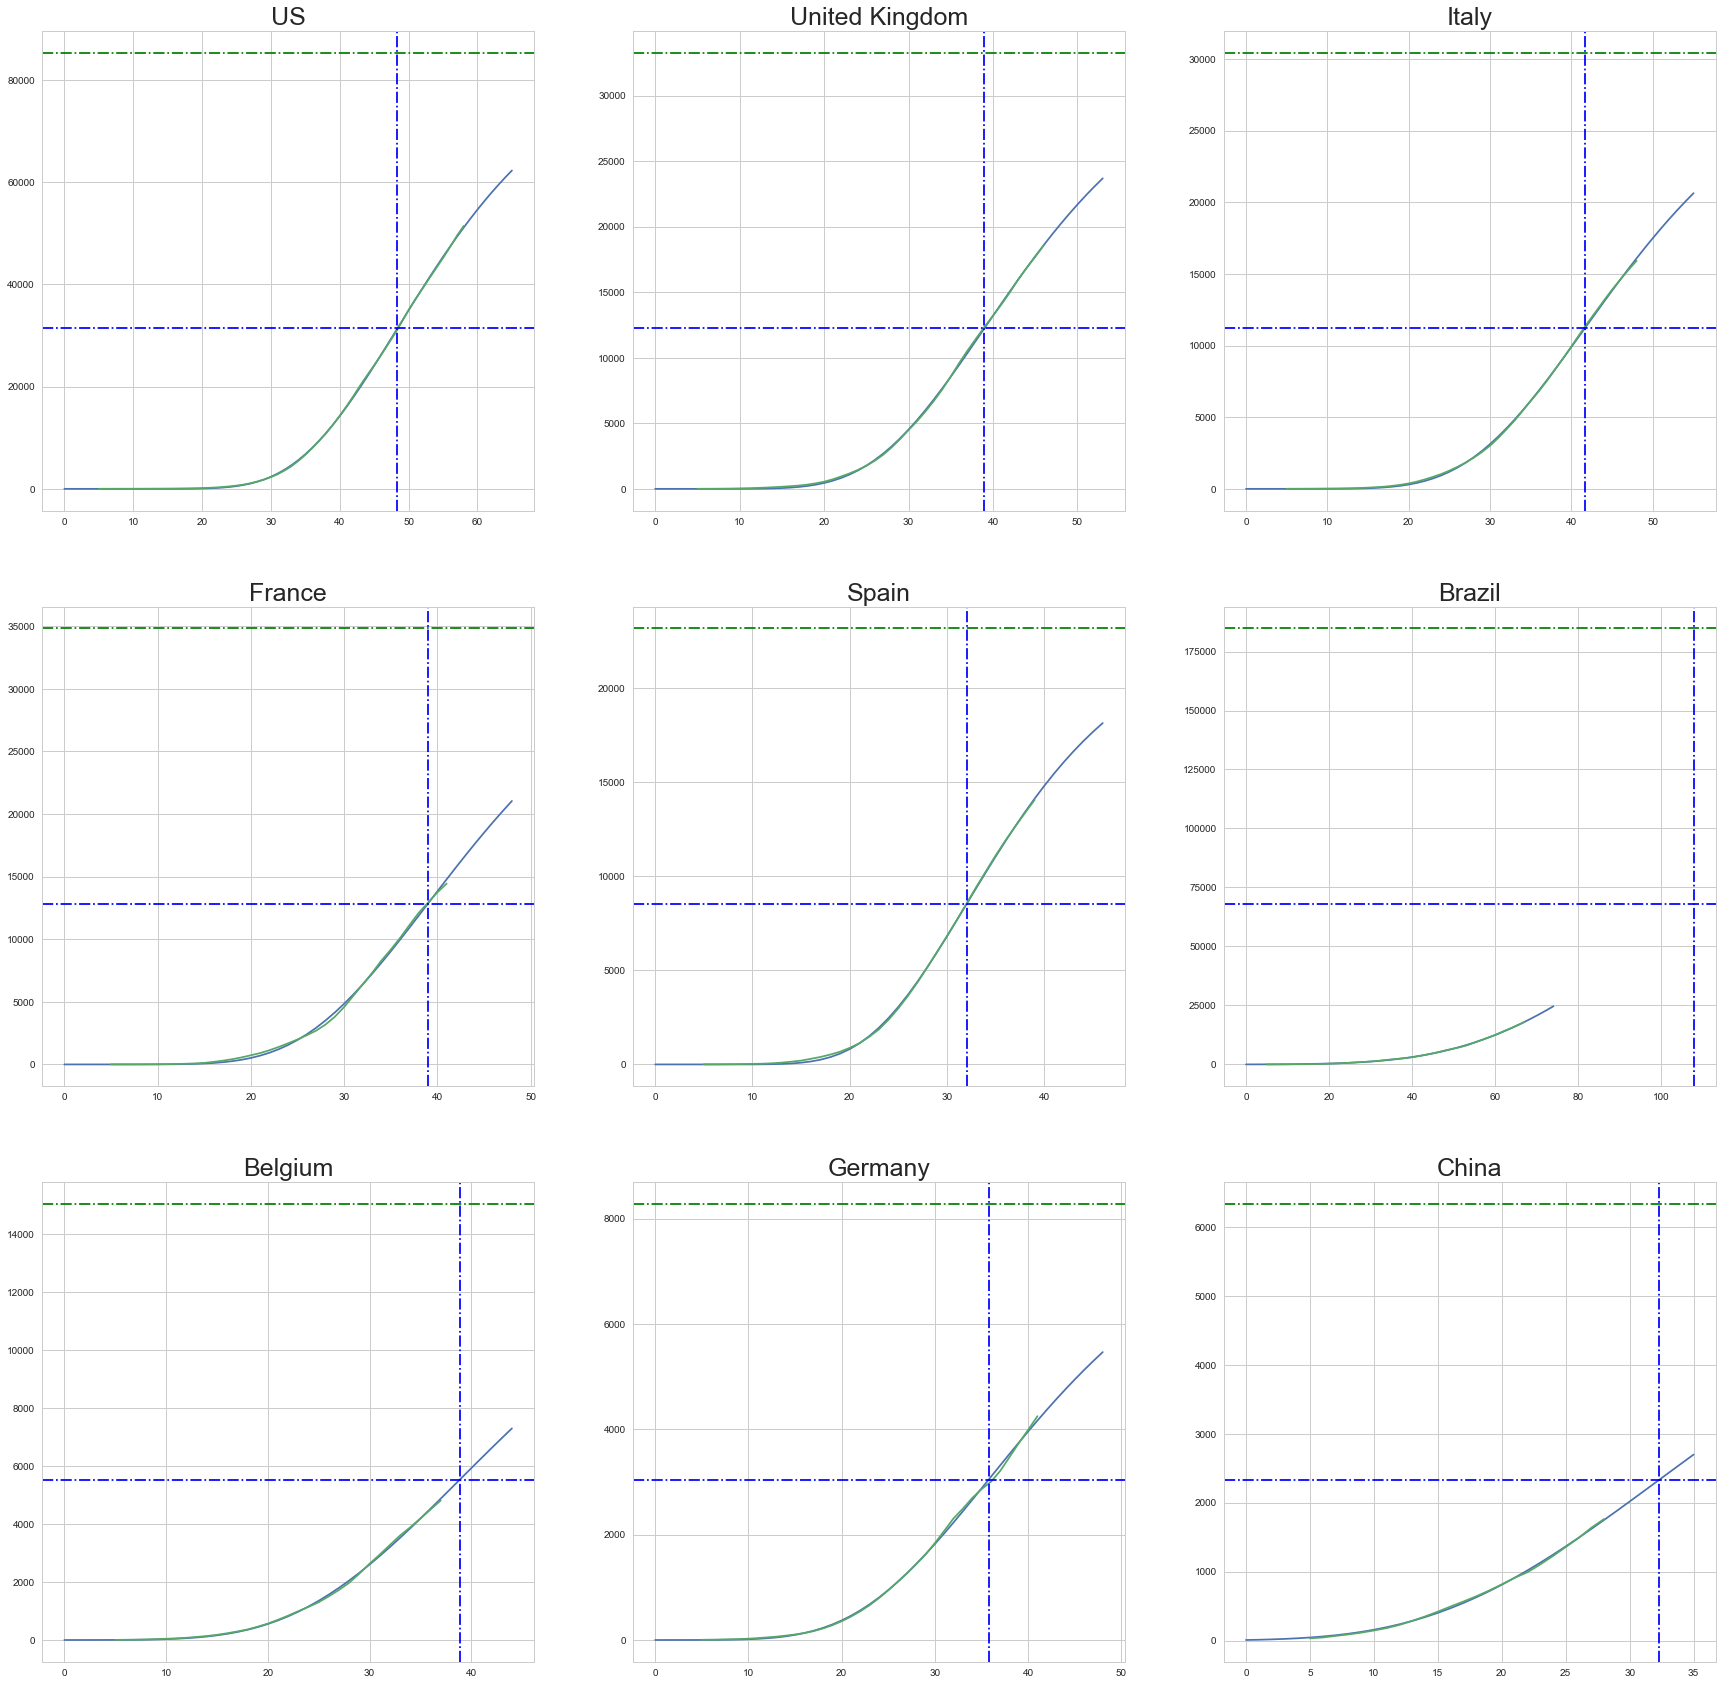

In [29]:
plt.figure(figsize=(30,30))
subplt = 1
for i in deaths_global_zero.columns:
    plt.subplot(3, 3, subplt)
    plt.plot(forecasting_med_mov_inflex[i][0])
    plt.plot(range(Media_movel,len(forecasting_med_mov_inflex[i][6])+Media_movel), forecasting_med_mov_inflex[i][6])
    plt.axhline(forecasting_med_mov_inflex[i][4], color='g', ls ='-.')
    plt.axvline(forecasting_med_mov_inflex[i][2], color='b', ls ='-.')
    plt.axhline(forecasting_med_mov_inflex[i][3], color='b', ls ='-.')
    plt.title(i, size=25)
    subplt+=1

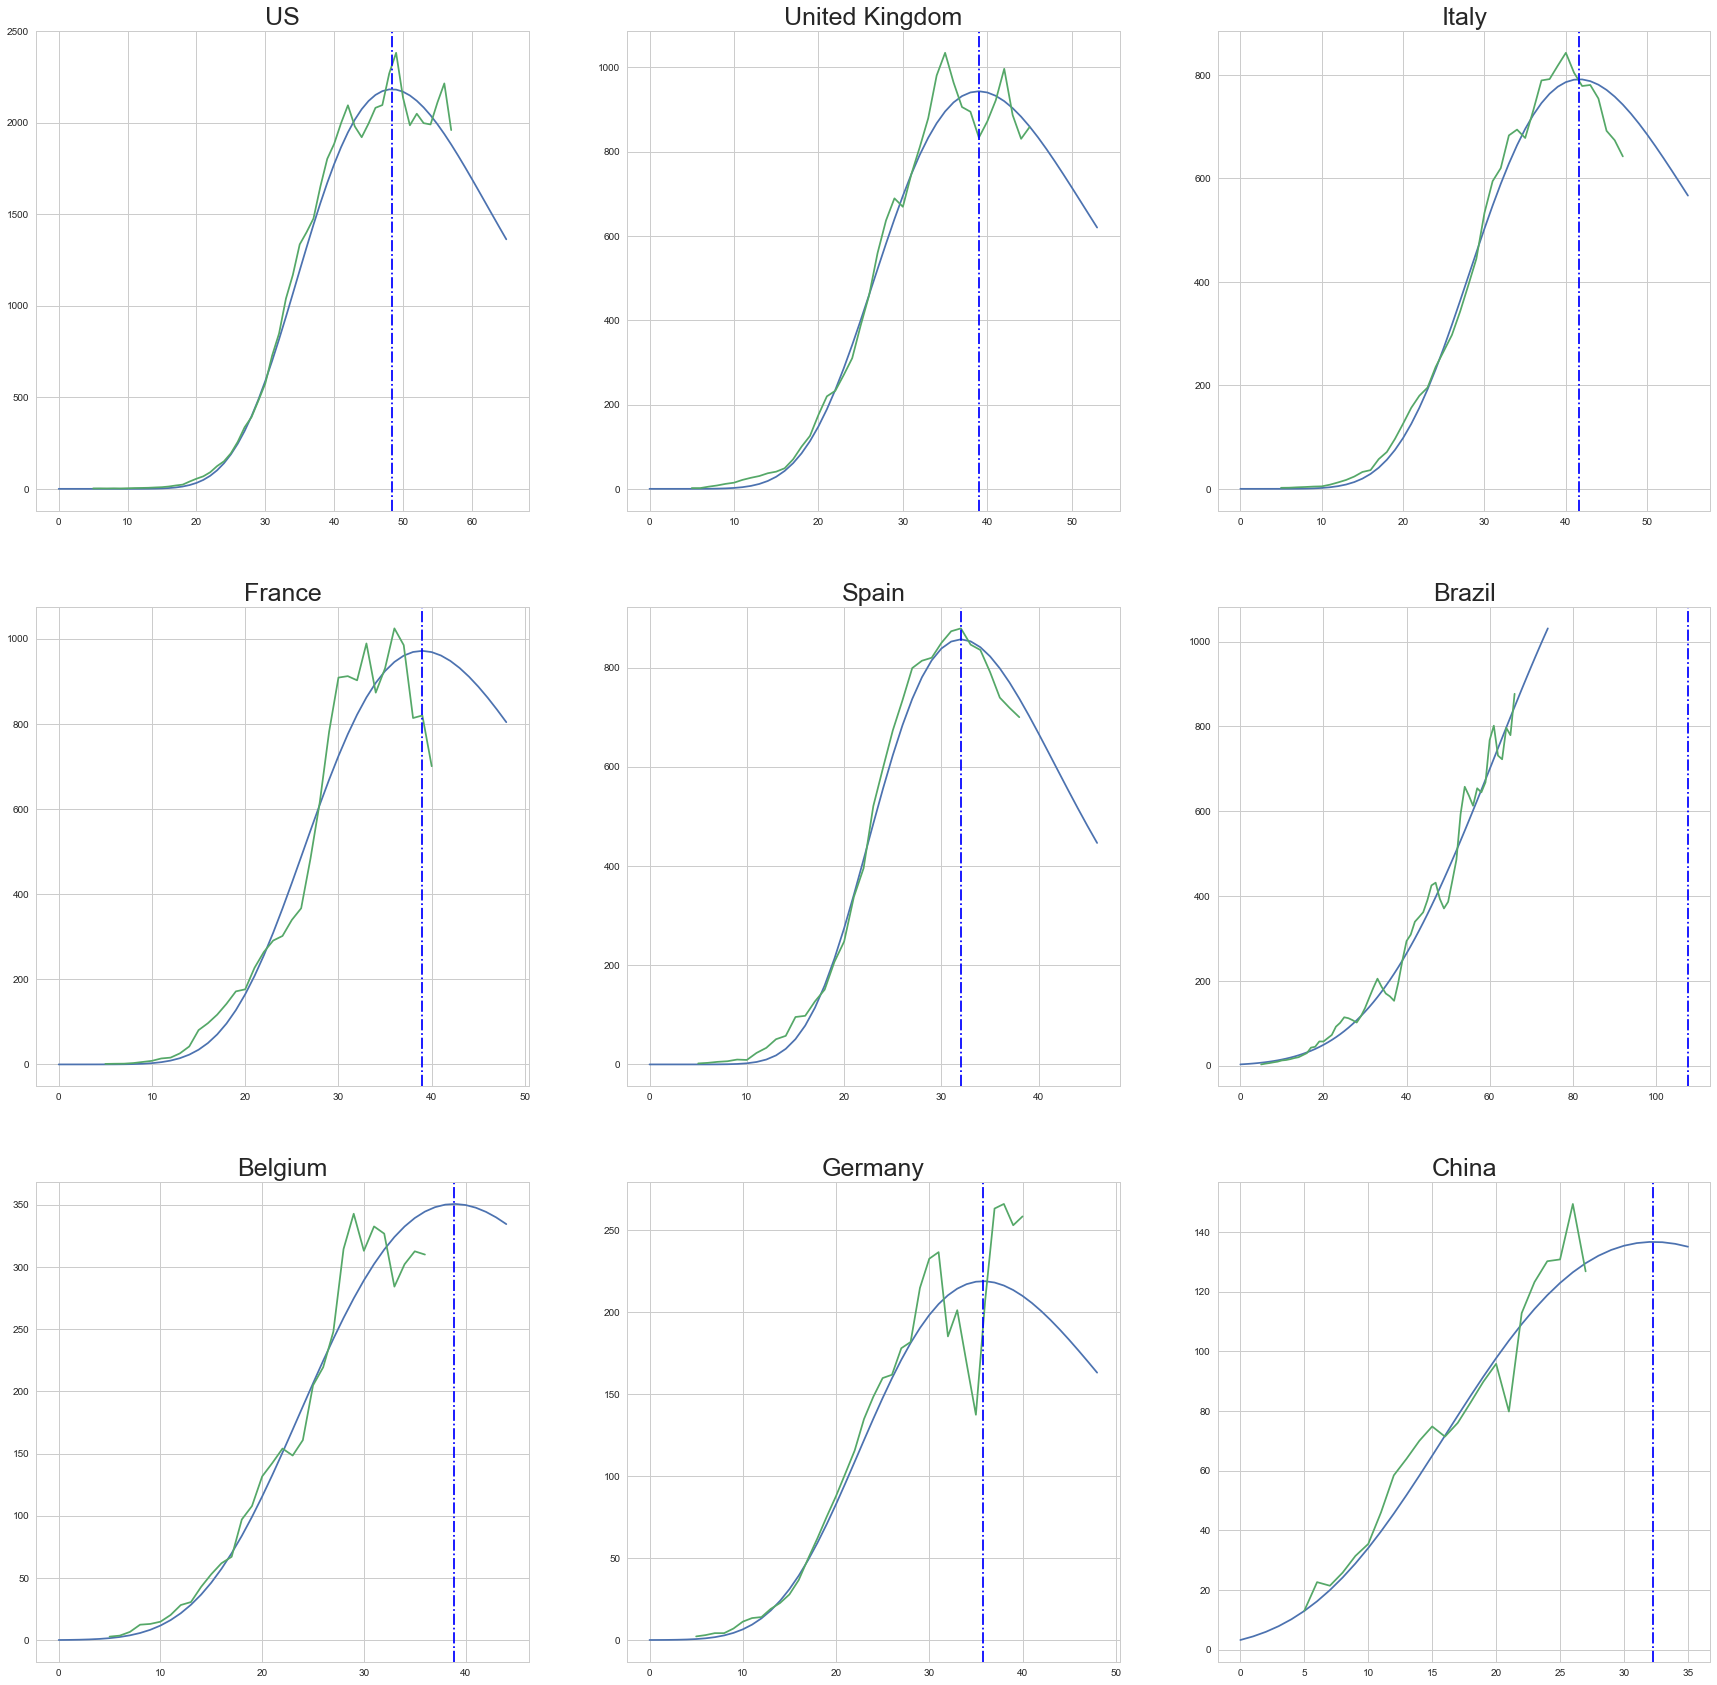

In [30]:
plt.figure(figsize=(30,30))
subplt = 1
for i in deaths_global_zero.columns:
    plt.subplot(3, 3, subplt)
    plt.plot(forecasting_med_mov_inflex[i][1])
    plt.plot(range(Media_movel,len(forecasting_med_mov_inflex[i][7])+Media_movel),forecasting_med_mov_inflex[i][7])
    plt.axvline(forecasting_med_mov_inflex[i][2], color='b', ls ='-.')
    plt.title(i, size=25)
    subplt+=1

In [31]:
dados_erros={}

for i in forecasting_med_mov.columns:
    erro_previsao = []
    if (i != 'Brazil'):
        reality = forecasting_med_mov[i][6][len(forecasting_med_mov_inflex[i][6]):len(forecasting_med_mov_inflex[i][6])+Dias_previsao]
        forecast7daysbefore = forecasting_med_mov_inflex[i][0][-Dias_previsao:]
        
        for day in range(Dias_previsao):
            erro_previsao.append((100*abs(reality[day]-forecast7daysbefore[day])/reality[day]))
        dados_erros[i]=erro_previsao
        
dados_erros = pd.DataFrame(dados_erros)
dados_erros

,Belgium,China,France,Germany,Italy,Spain,US,United Kingdom
0,2.107928,0.007950,3.348491,2.037827,1.741421,0.425753,0.555697,0.036254
1,3.350730,0.995422,3.962088,1.913415,2.334868,0.373983,0.540652,0.178488
2,5.386569,0.954762,4.159014,1.697361,2.714685,0.218207,0.936328,0.322268
3,7.391988,1.808730,4.133871,2.351854,2.965025,0.088500,1.340664,1.176346
4,9.430289,2.489544,4.370655,3.283694,3.264702,0.164600,2.095575,1.451314
5,11.417118,3.450522,5.418788,3.702645,3.397712,0.009729,2.934967,1.418794
6,12.879213,4.868255,6.494568,3.967918,3.409469,0.419819,3.578194,1.668809


We can see below that the error increases according to the forecast day, with day zero being the smallest error in China of 0.007% and the biggest error in France of 3.34%. For the 7 day forecast 0.42% for Spain and 12.87% for Belgium. We can see that the forecast error decreased considerably with the forecast occurring after the maximum number of record point.

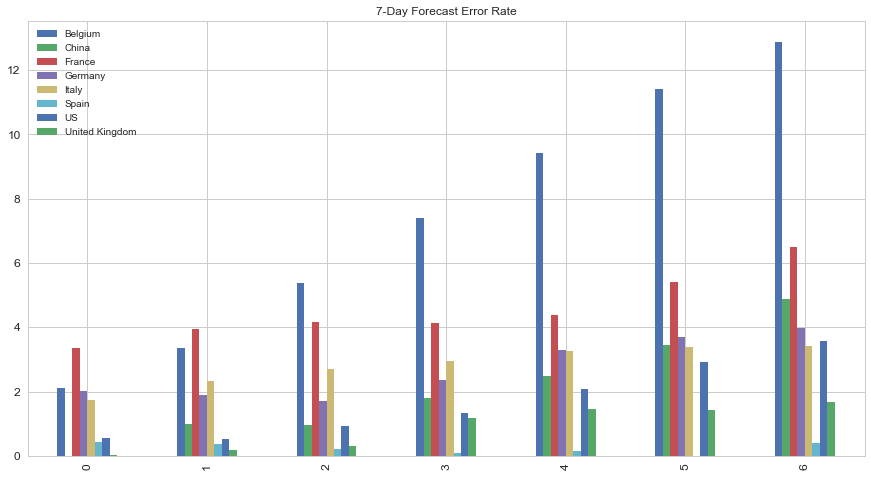

In [32]:
dados_erros.plot.bar(rot=90,figsize=(15,8),title='7-Day Forecast Error Rate',fontsize=12);

#### 7.3 PROJECTION OF THE TOTAL NUMBER OF DEAD CONSIDERING THE CURRENT DATA

In [33]:
total_mortos = {}
for i in forecasting_med_mov.columns:
    lista_mortos=[]
    lista_mortos.append(forecasting_med_mov[i][4])
    total_mortos[i]=lista_mortos
    
total_mortos = pd.DataFrame(total_mortos)
total_mortos = total_mortos.append(deaths_global_df.iloc[-1:])
total_mortos.index.names = ['Comparison Prediction and Reality']
total_mortos = total_mortos.rename(index={0: 'No. Max. Dead Forecast Model',120:'Current Values'})
total_mortos

,Belgium,Brazil,China,France,Germany,Italy,Spain,US,United Kingdom
Comparison Prediction and Reality,,,,,,,,,
No. Max. Dead Forecast Model,9435.98,184806,3351.67,28366.2,8855.6,33574.1,28313,110712,38730.3
Current Values,9186,20047,3326,28218,8203,32486,27940,94702,36124


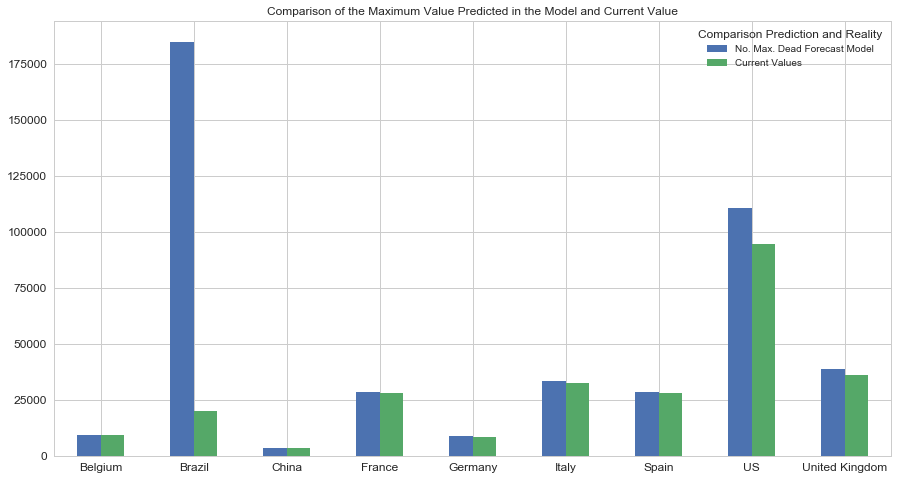

In [34]:
total_mortos.T.plot.bar(rot=0,figsize=(15,8),title='Comparison of the Maximum Value Predicted in the Model and Current Value',fontsize=12)

### 8. CONCLUSION <a id="CONCLUSION"></a>

In general, what I tried to defend in this work is that the Virus has a behavior that can be modeled with a certain level of precision when we use this type of sigmoid function. From then on, I do an empirical test using data from countries that have gone through the moment of greatest record of cases and verifying how the model would work considering that it did not have the whole history, as is the current case of Brazil that has not yet reached the peak of cases.

The second issue that calls my attention is that the greater the number of cases, the greater the decrease in cases that can be worsened by the relaxation of actions, that is, reaching the lowest peak in the number of cases is not all, but the beginning of a new moment. The curve becomes more faithful the longer we can maintain safety actions even with social relaxation. To follow the curve or not is to measure the efficiency of the actions.

Third point is the mathematical practicality of the evaluation, as many models use variables that are not so simple to use. The data is very noisy in itself and its origins are doubtful. Especially in Brazil, we do not have many reliable data sources, but it is certain to predict that any model that enters garbage will leave garbage.

Fourth point, the analysis is based on the number of deaths because they are less questionable while the number of cases due to contamination is very questionable. But by making an inference in the number of deaths we can make an indirect inference to the number of confirmed cases.

There are many questions but when we study physics we realize that many natural processes have a more or less characteristic behavior and that in this case it seems reasonable to say that Covid-19 Pandemic has a sigmoidal behavior.

Lincoln